## Business Overview

Company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps:
1. Load data
2. Data inspection
3. Handle Missing values
4. Add or transform features
5. Train/Test split
6. Scaling
7. Base line Modelling
8. Tuning with regularisation (Ridge/Lasso)
9. Model Evaluation:

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
house_df = pd.read_csv("train.csv")

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house_df.shape

(1460, 81)

In [8]:
def convert_na(df, column_name, na_string):
    df[column_name].fillna(na_string, inplace=True)

In [9]:
def rectify_column_na(df):
    # As per given dictionary, NA does not means null value, so changing all NA values as per Data dictionary.
    column_to_na = {
        'Alley': 'No alley access',
        'BsmtQual': 'No Basement',
        'BsmtCond': 'No Basement',
        'BsmtExposure': 'No Basement',
        'BsmtFinType1': 'No Basement',
        'BsmtFinType2': 'No Basement',
        'FireplaceQu': 'No Fireplace',
        'GarageType': 'No Garage',
        'GarageFinish': 'No Garage',
        'GarageQual': 'No Garage',
        'GarageCond': 'No Garage',
        'PoolQC': 'No Pool',
        'Fence': 'No Fence',
        'MiscFeature': 'None'
    }
    for column_name in column_to_na:
        df[column_name].fillna(column_to_na[column_name], inplace=True)

In [10]:
rectify_column_na(house_df)

In [11]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [12]:
def draw_barplot(df, xAxis, yAxis):
    
    '''
    Util method to plot barplot
    input: X and Y axis column name
    output: Plot
    return: None
    '''
    plt.figure(figsize=(20,10))
    plt.ylabel(yAxis,fontsize=14,color='w')
    plt.xlabel(xAxis,fontsize=14,color = 'w')      
    plt.title("Barplot: {0} vs {1}".format(xAxis, yAxis),fontsize=14)
    sbn.barplot(data=df, x=xAxis, y=yAxis, orient='v')
    plt.show()

### As part of Univariant analysis, we will try to analyse some of the features affect on SalesPrice before building the model. Some of the know feature like Building type, Condition, Garage Type etc we will analyse.

#### We will be sticking to Univariants analysis more, as we have many variables to play with going beyond Univariant will make things more complex.

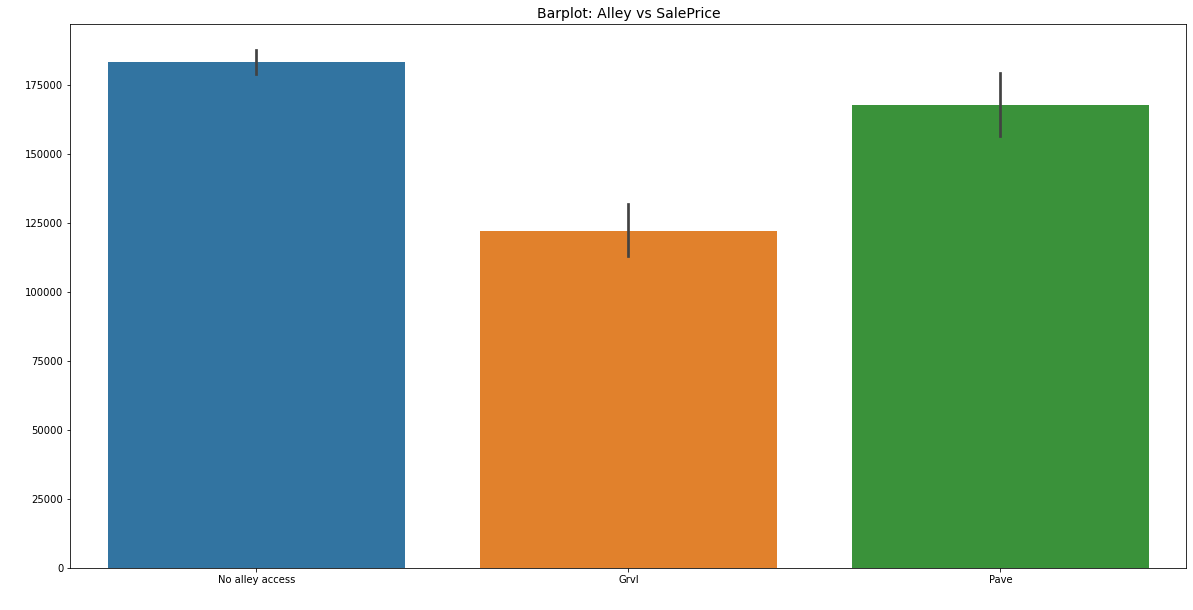

In [13]:
draw_barplot(house_df, 'Alley', 'SalePrice')

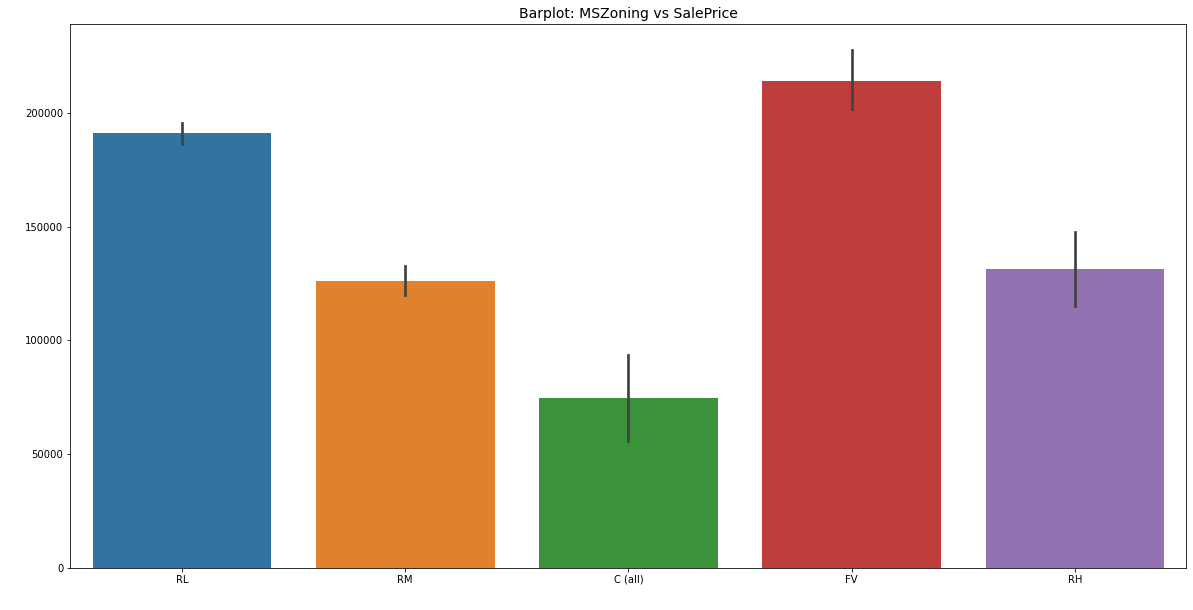

In [14]:
draw_barplot(house_df, 'MSZoning', 'SalePrice')

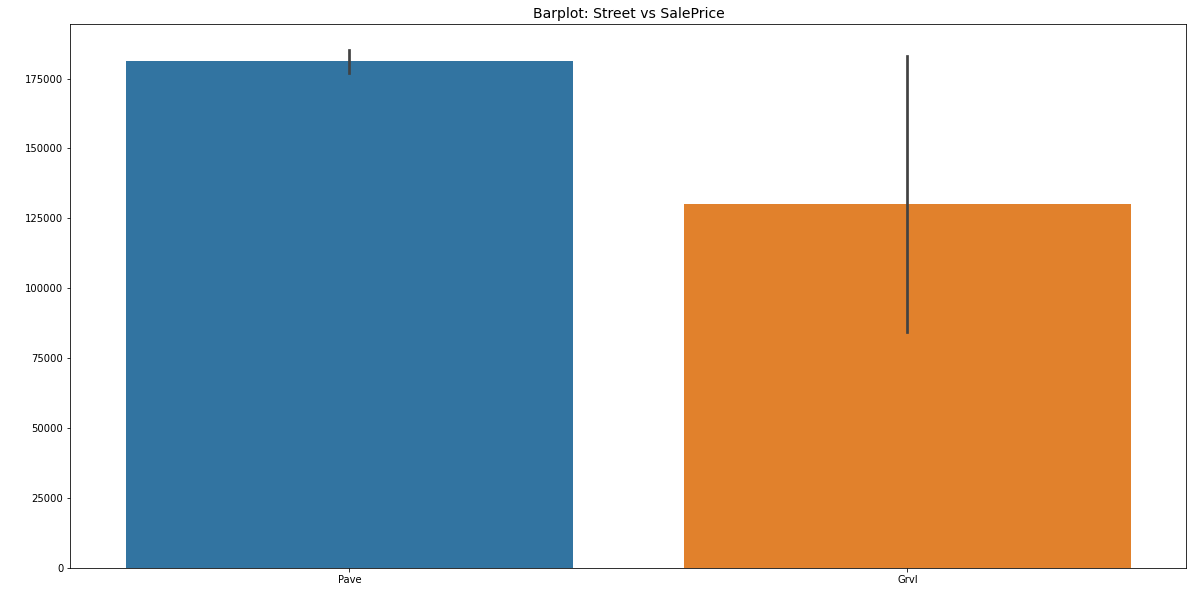

In [15]:
draw_barplot(house_df, 'Street', 'SalePrice')

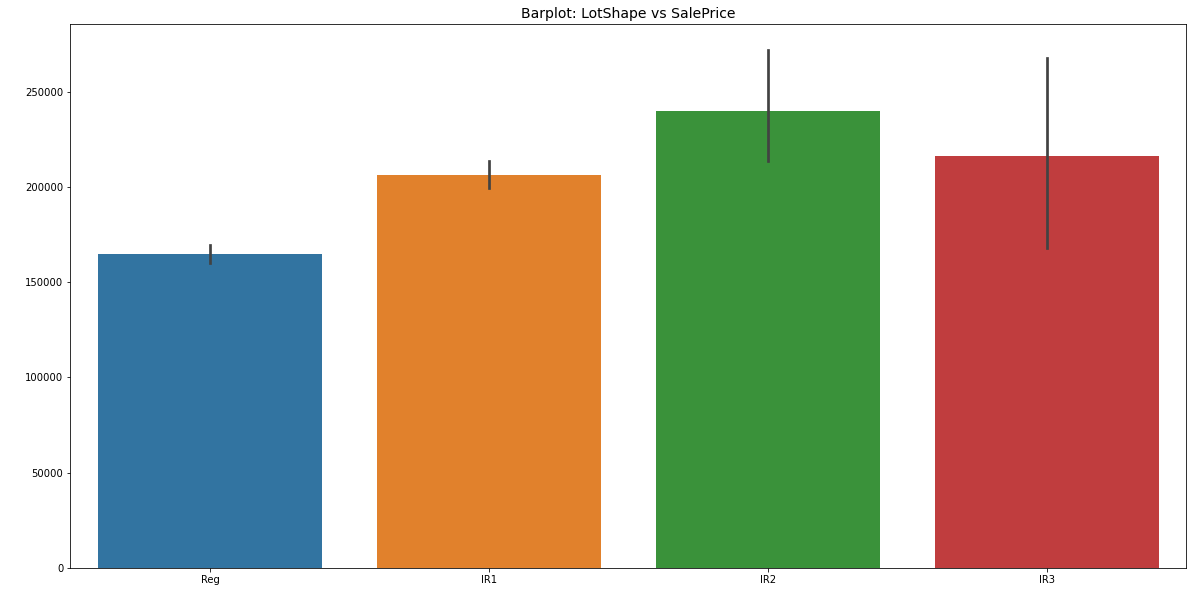

In [16]:
draw_barplot(house_df, 'LotShape', 'SalePrice')

#### This is interesting, that irregular lot shape is fetching more price than regular. Which as per Land rate is understandable. But Type 4 of Irregualr Lot shape fetch less than Type 2.

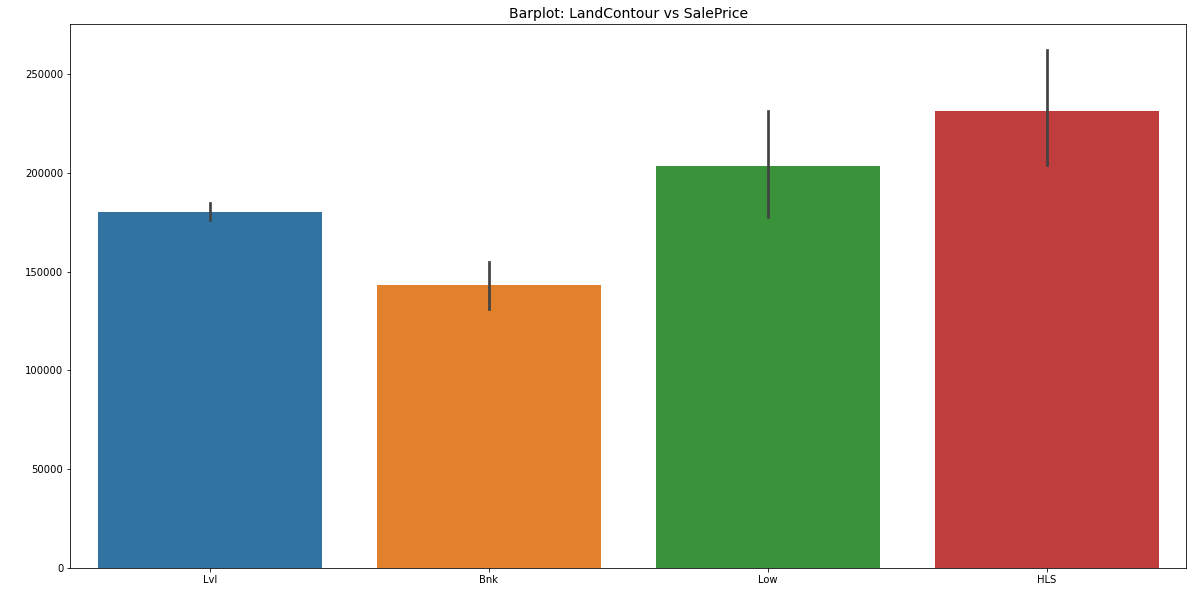

In [17]:
draw_barplot(house_df, 'LandContour', 'SalePrice')

#### Hill side properties are fetching significantly more price.

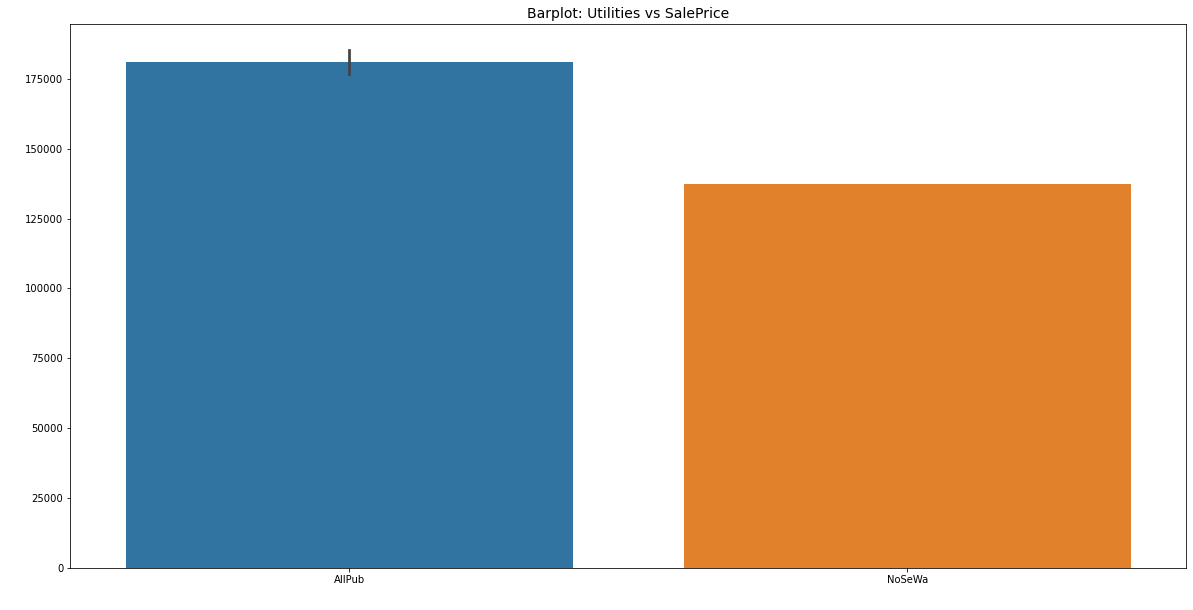

In [18]:
draw_barplot(house_df, 'Utilities', 'SalePrice')

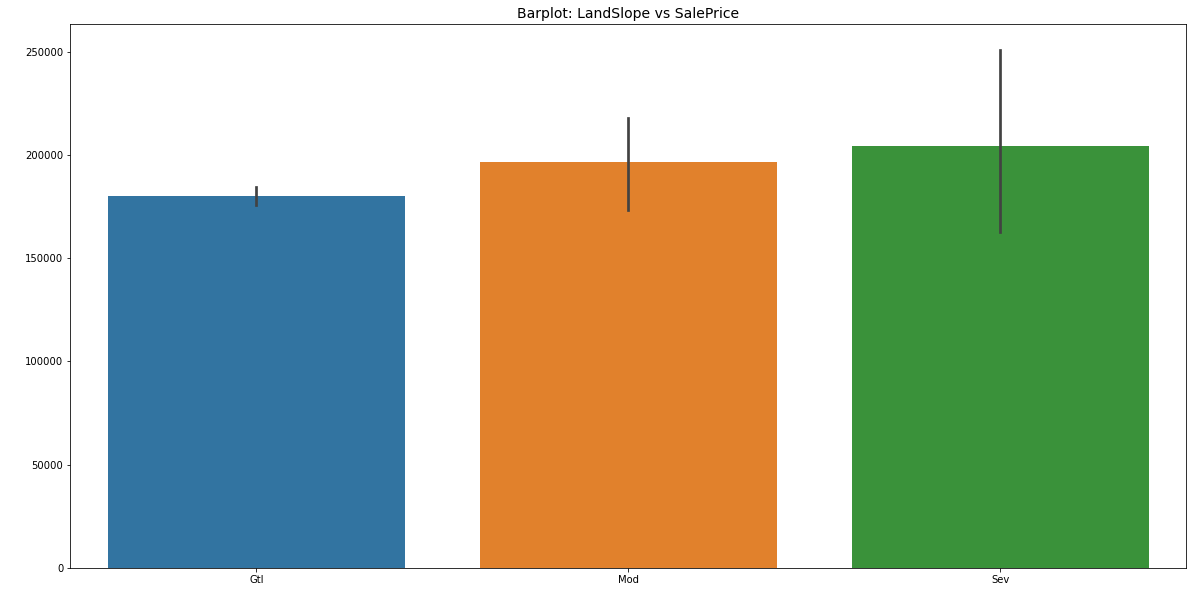

In [19]:
draw_barplot(house_df, 'LandSlope', 'SalePrice')

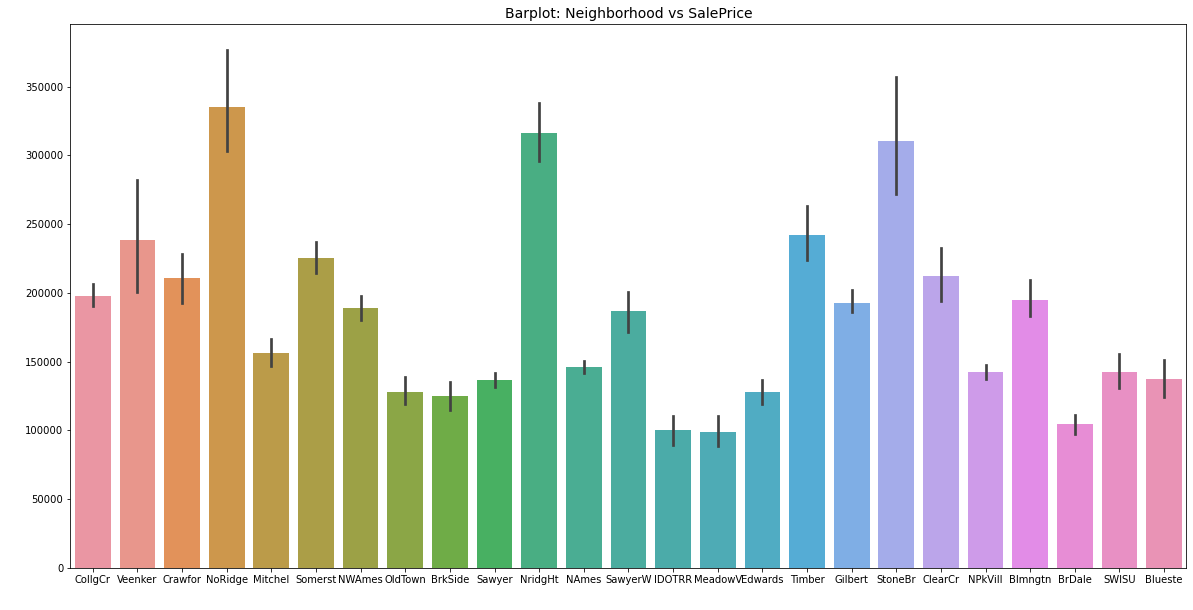

In [20]:
draw_barplot(house_df, 'Neighborhood', 'SalePrice')

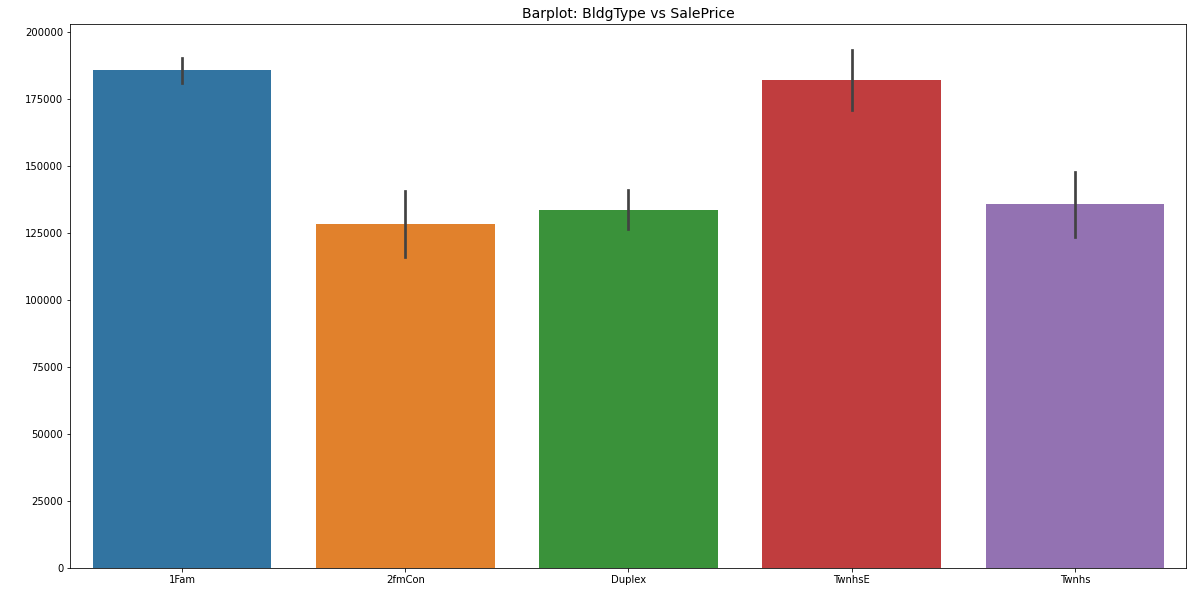

In [21]:
draw_barplot(house_df, 'BldgType', 'SalePrice')

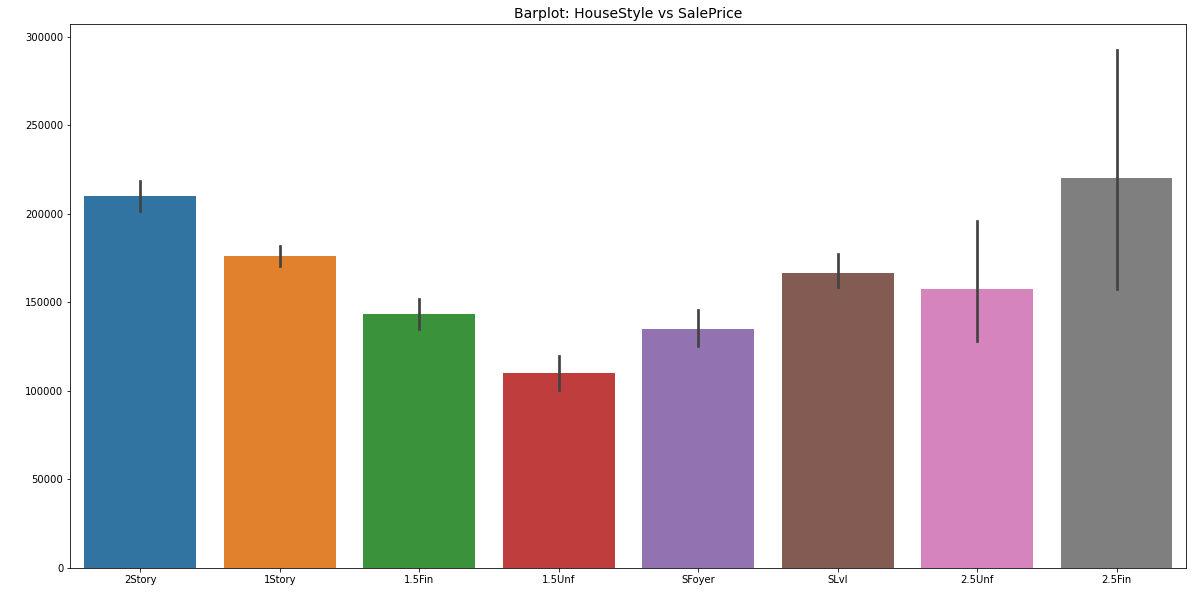

In [22]:
draw_barplot(house_df, 'HouseStyle', 'SalePrice')

### Lets check if roof style affects Sale Price

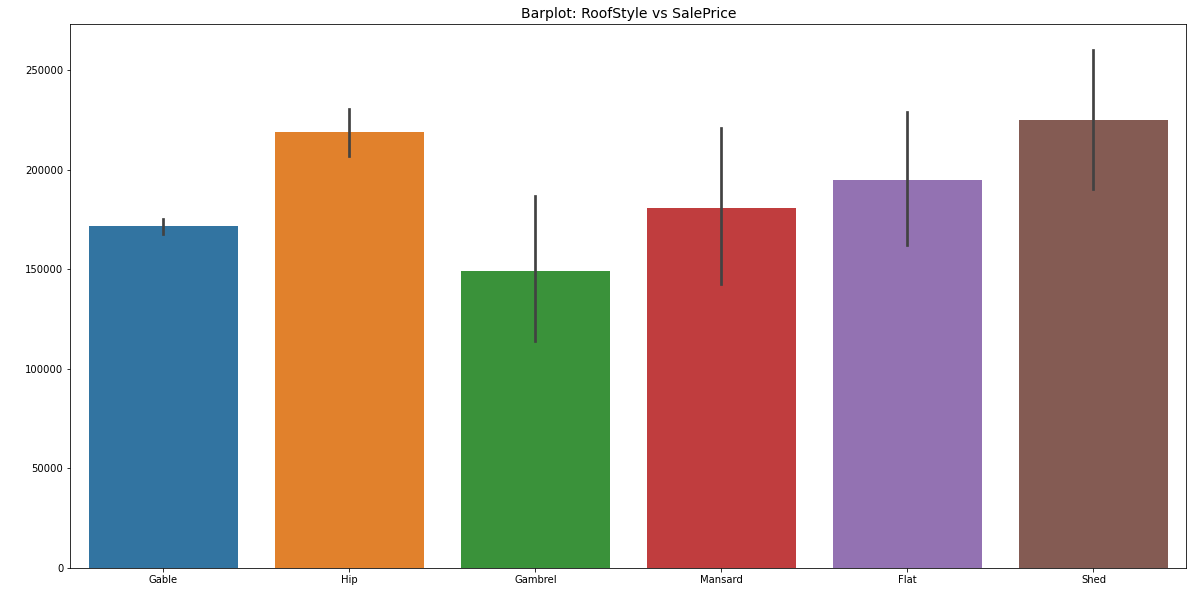

In [23]:
draw_barplot(house_df, 'RoofStyle', 'SalePrice')

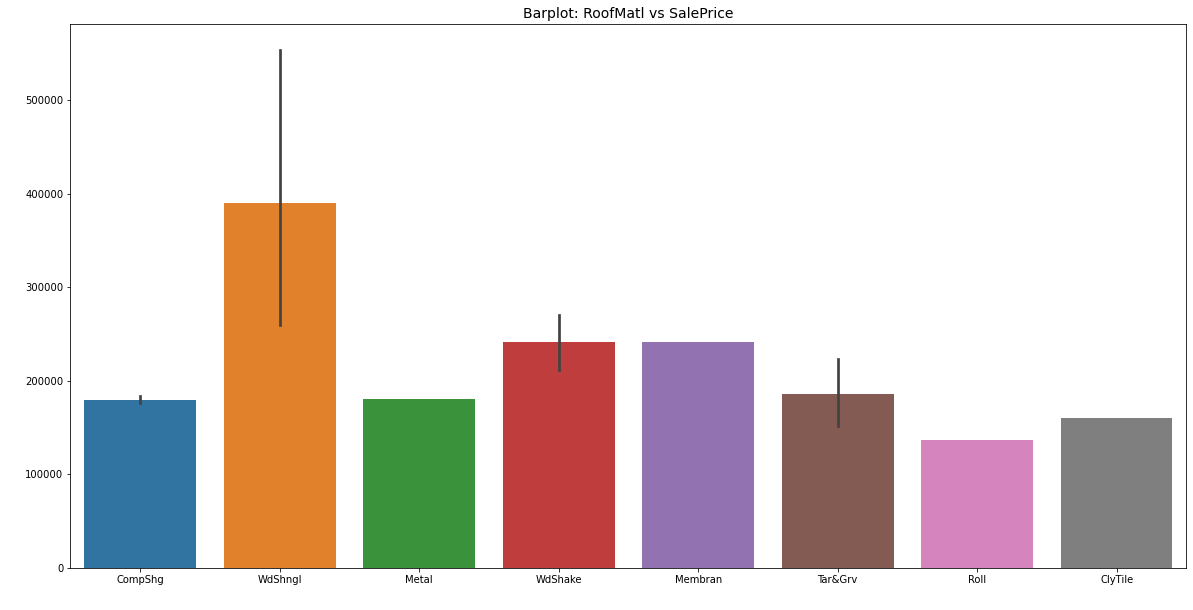

In [24]:
draw_barplot(house_df, 'RoofMatl', 'SalePrice')

### Some data like "OverallCond" etc are present in numerical format,  these needs to be converted to catagorical data first for analysis purpose.

In [25]:
def apply_mapping(df, column_name, mapObj):
    df[column_name] = df[column_name].map(mapObj)

In [26]:
conditionMap = {
    10: 'Very Excellent',
    9:'Excellent',
    8:'Very Good',
    7:'Good',
    6:'Above Average',
    5:'Average',
    4:'Below Average',
    3:'Fair',
    2:'Poor',
    1:'Very Poor'
}
apply_mapping(house_df, 'OverallQual', conditionMap)
apply_mapping(house_df, 'OverallCond', conditionMap)

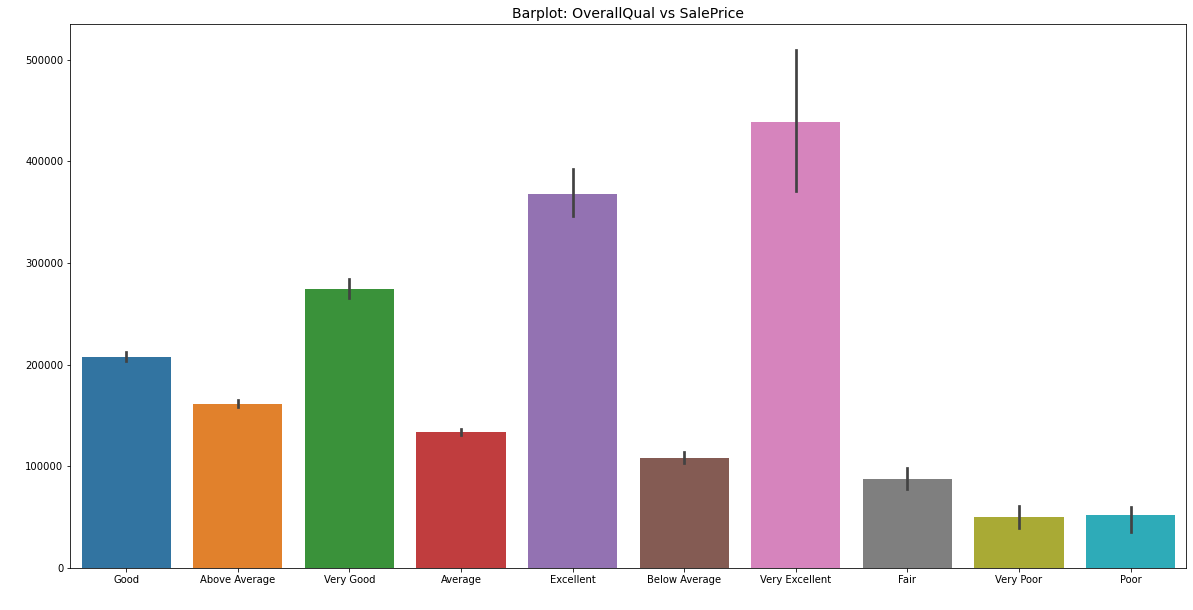

In [27]:
draw_barplot(house_df, 'OverallQual', 'SalePrice')

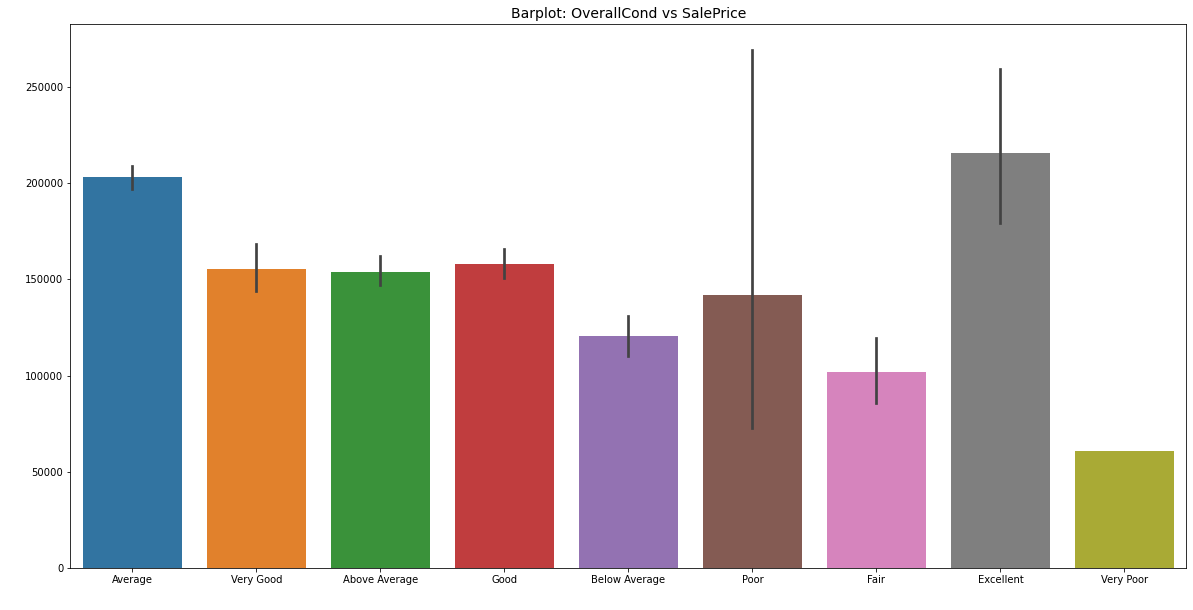

In [28]:
draw_barplot(house_df, 'OverallCond', 'SalePrice')

#### Overall condition of the house does affects the SalesPrice and shows nicly by the plot as well. A well maintained house can be seen fetching more SalesPrice.

In [29]:
MSSubClassMap = {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
   120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
   150: '1-1/2 STORY PUD - ALL AGES',
   160: '2-STORY PUD - 1946 & NEWER',
   180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
   190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}
apply_mapping(house_df, 'MSSubClass', MSSubClassMap)

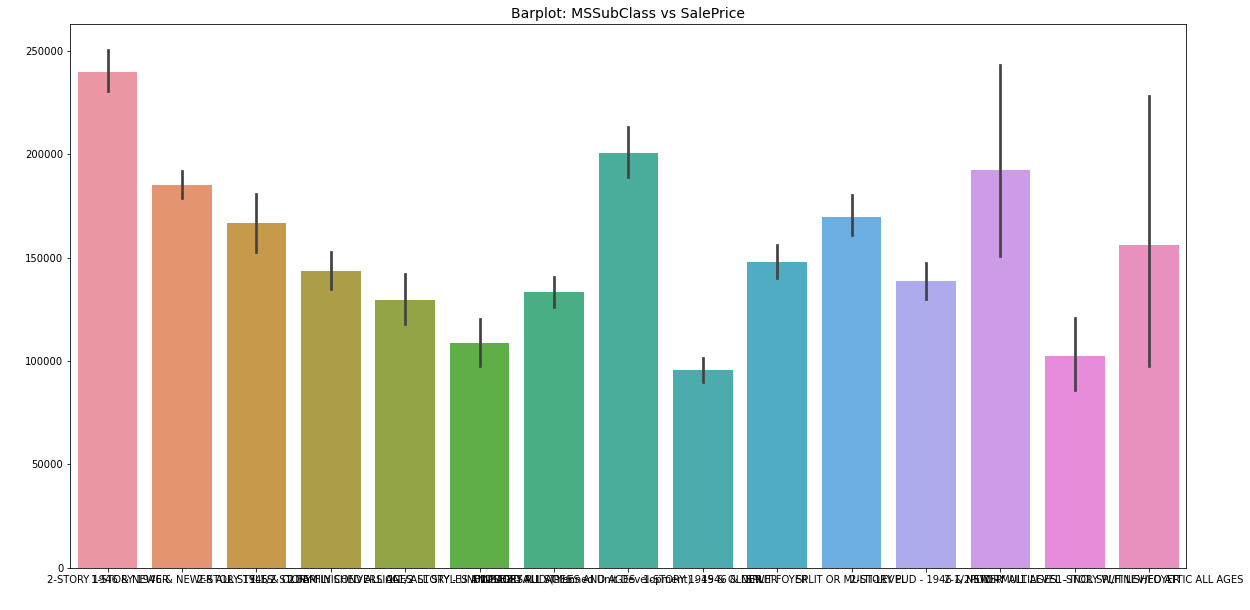

In [30]:
draw_barplot(house_df, 'MSSubClass', 'SalePrice')

In [31]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


### Lets check if Foundation and Basement features affect Sales Price

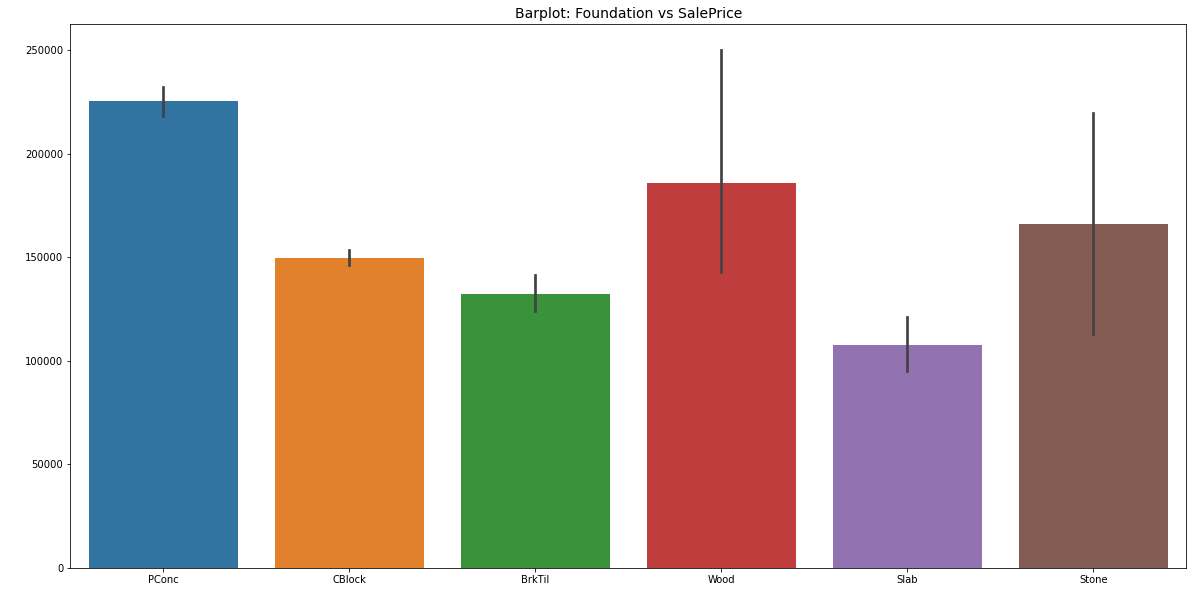

In [32]:
draw_barplot(house_df, 'Foundation', 'SalePrice')

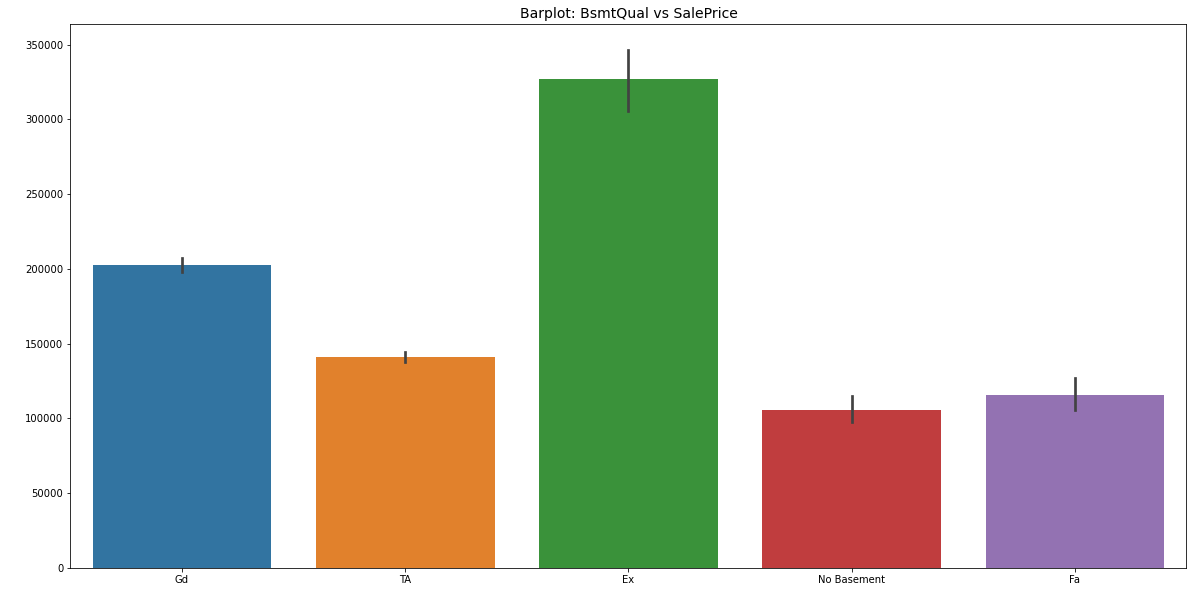

In [33]:
draw_barplot(house_df, 'BsmtQual', 'SalePrice')

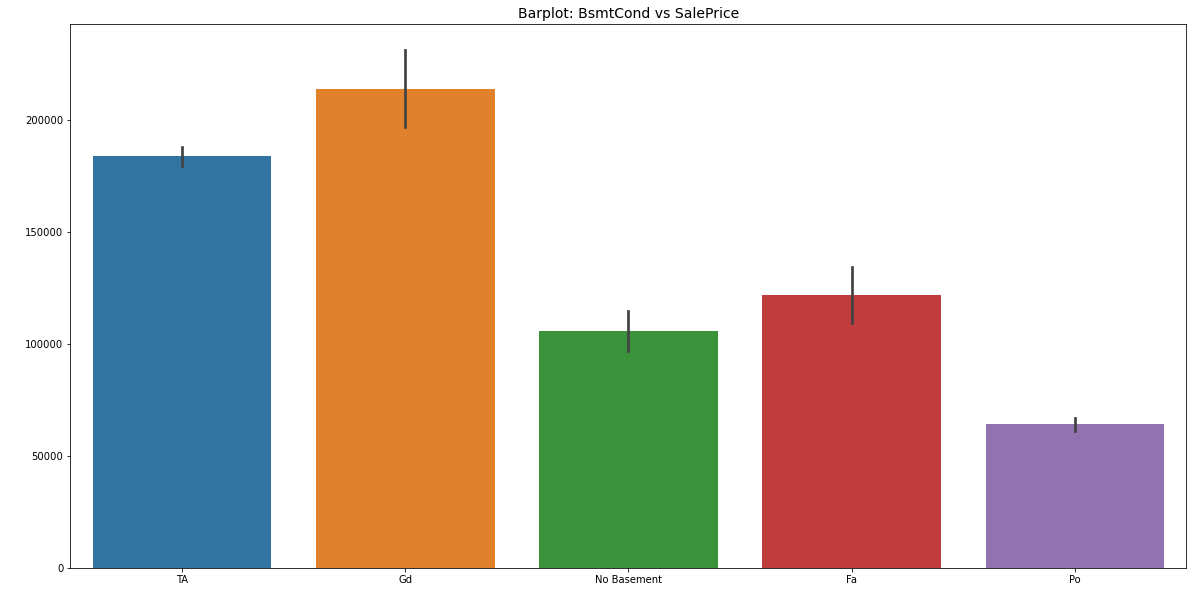

In [34]:
draw_barplot(house_df, 'BsmtCond', 'SalePrice')

#### As expected and confirmed by plots above, Basement and Foundation is affecting "SalesPrice"

### Lets check if Garage features affect Sales Price

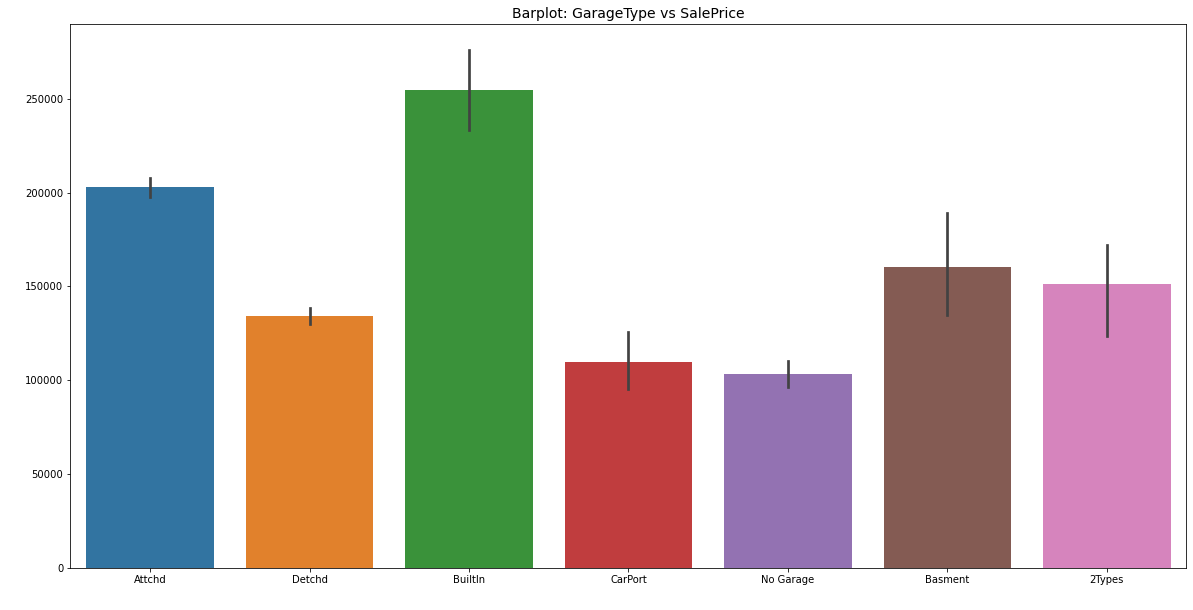

In [35]:
draw_barplot(house_df, 'GarageType', 'SalePrice')

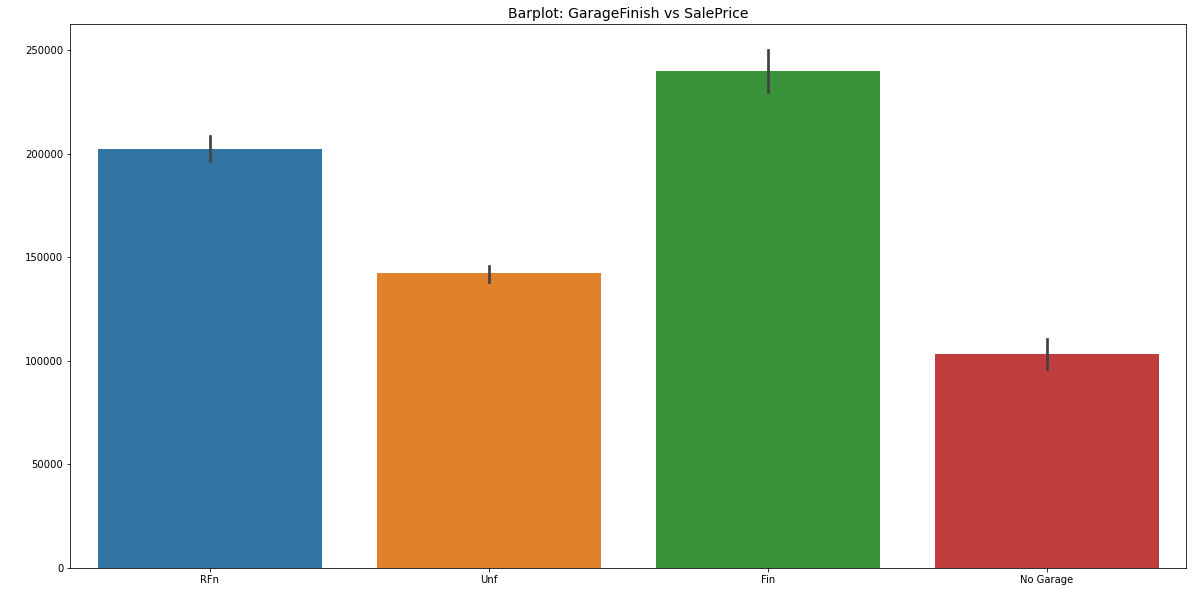

In [36]:
draw_barplot(house_df, 'GarageFinish', 'SalePrice')

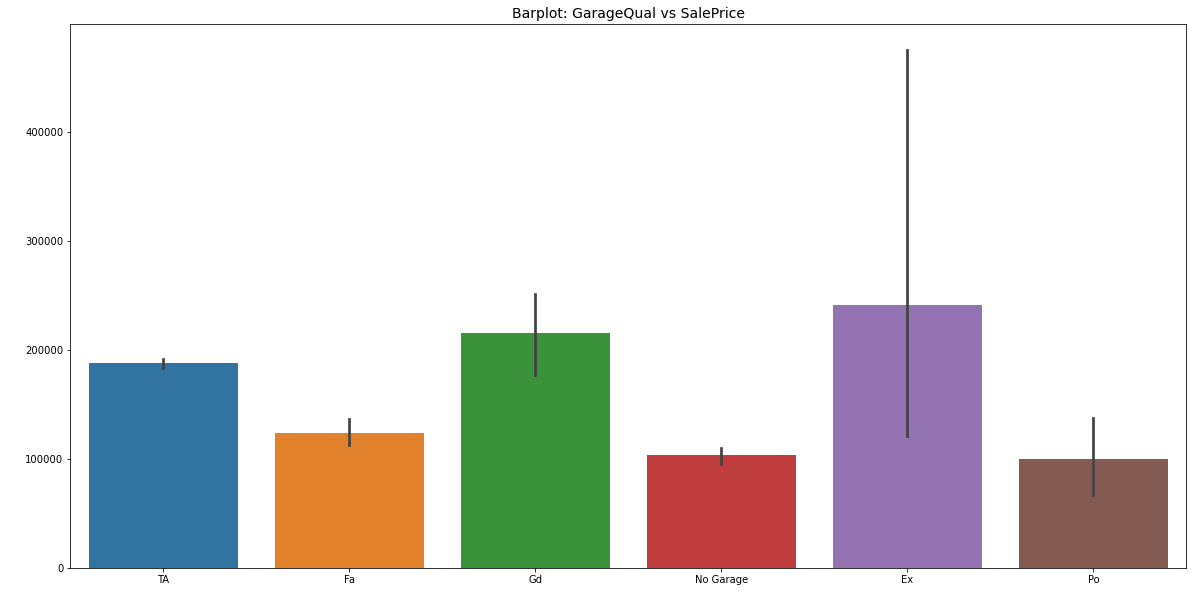

In [37]:
draw_barplot(house_df, 'GarageQual', 'SalePrice')

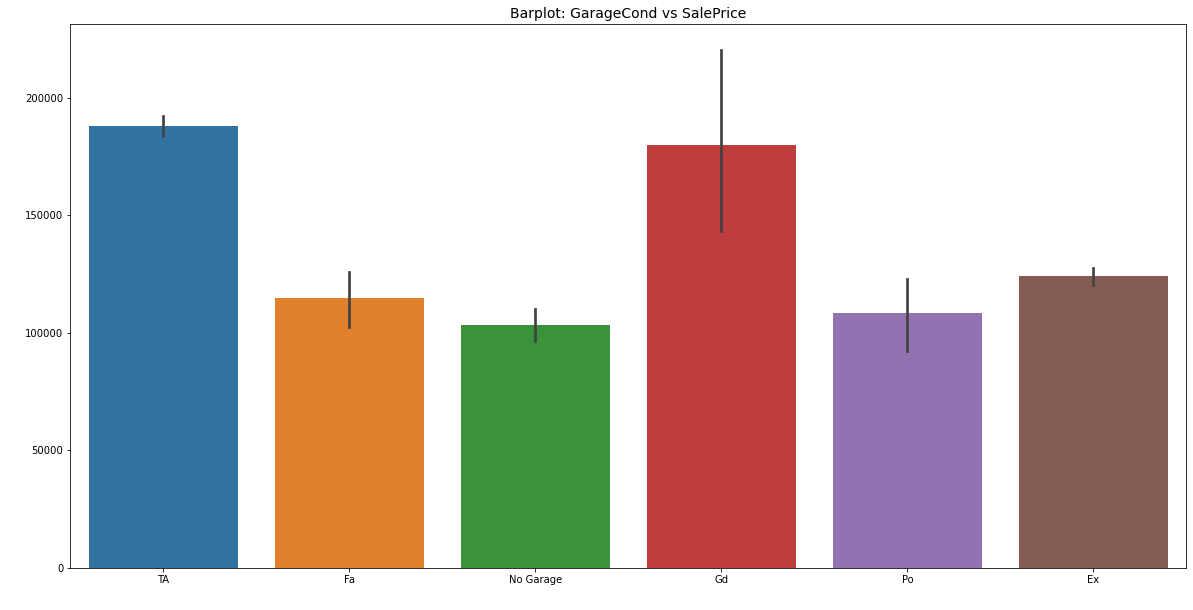

In [38]:
draw_barplot(house_df, 'GarageCond', 'SalePrice')

#### Garage condition and Quality seems to be having effect on the SalePrice, which is an expected fact and its good that data also shows the same.
#### We can see that having "No Garage" SalesPrice is very low

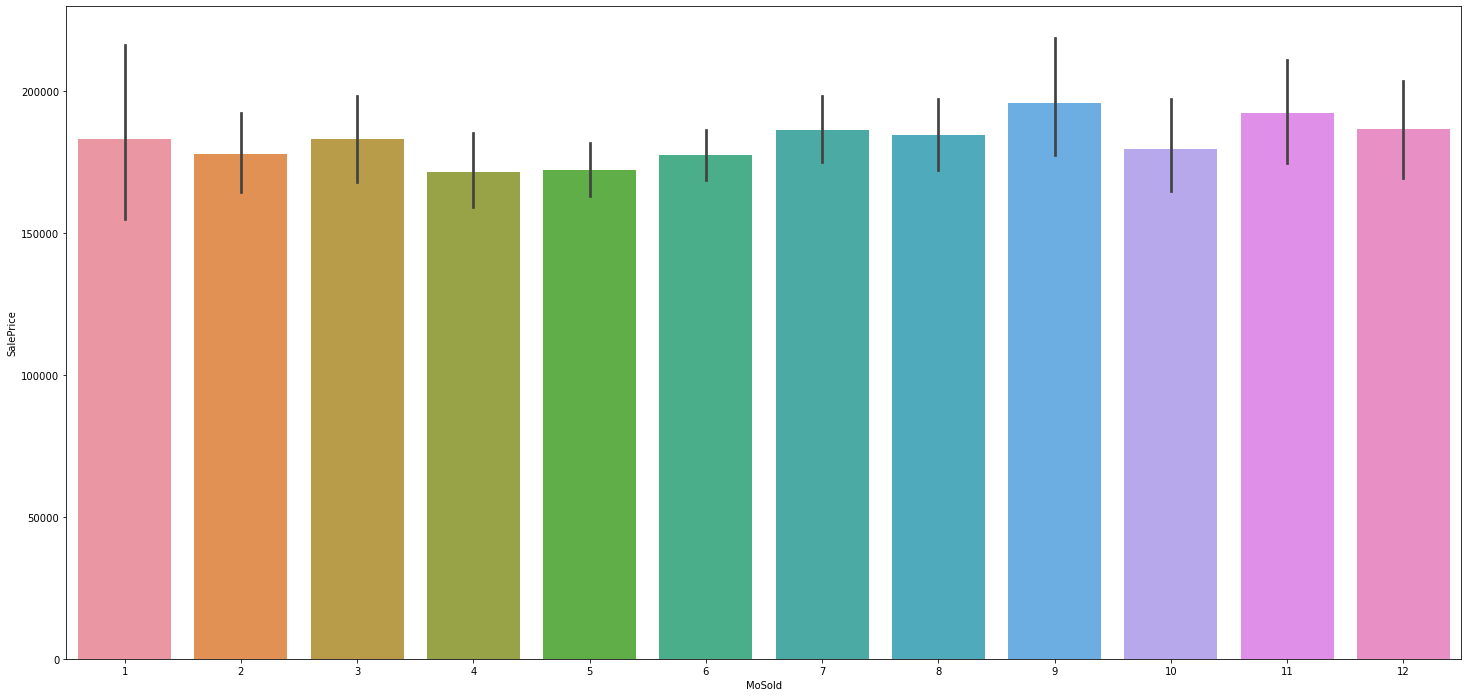

In [39]:
plt.figure(figsize=(25,12))
sbn.barplot(data=house_df, x='MoSold', y='SalePrice')
plt.show()

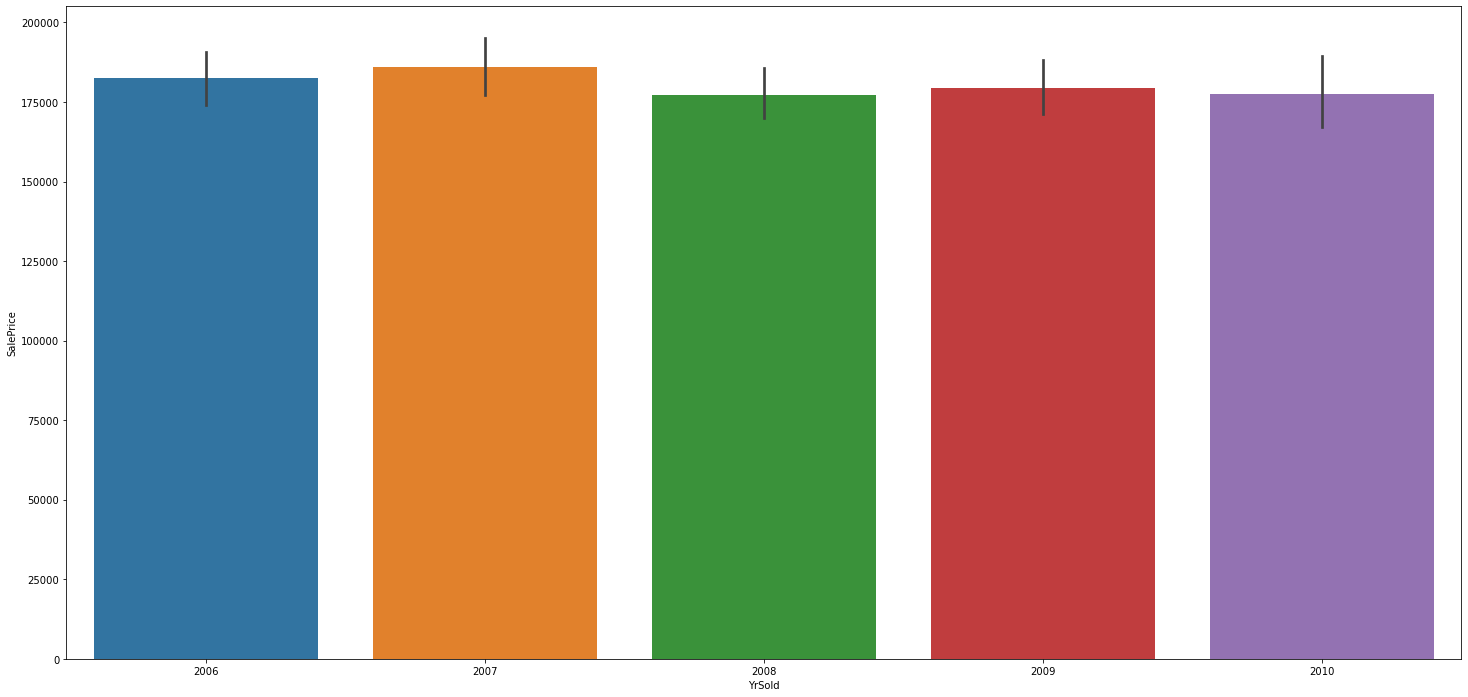

In [40]:
plt.figure(figsize=(25,12))
sbn.barplot(data=house_df, x='YrSold', y='SalePrice')
plt.show()

#### Year and Month does not seems to be chaning too and does not seems to be having much effect on the SalesPrice. As we know, Year etc does have effect on the SalePrice, so we will convert these to new field Age.

#### Date related columns does not seems to have much effect on the SalePrice, so its safe to remove them. One option is to convert year to age column, then we can apply scaling also in these columns.

In [41]:
# Converting years to age
house_df['YearBuilt_Age'] = house_df['YearBuilt'].max() - house_df['YearBuilt']
house_df['YearRemodAdd_Age'] = house_df['YearRemodAdd'].max() - house_df['YearRemodAdd']
house_df['YrSold_Age'] = house_df['YrSold'].max() - house_df['YrSold']
house_df['GarageYrBlt_Age'] = house_df['GarageYrBlt'].max() - house_df['GarageYrBlt']

# Dropping columns
house_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [42]:
missing_df = (house_df.isnull().sum() / house_df.isnull().count()*100).sort_values(ascending = False)
missing_df.head(20)

LotFrontage        17.739726
GarageYrBlt_Age     5.547945
MasVnrType          0.547945
MasVnrArea          0.547945
Electrical          0.068493
Street              0.000000
Functional          0.000000
GarageQual          0.000000
GarageArea          0.000000
GarageCars          0.000000
GarageFinish        0.000000
GarageType          0.000000
FireplaceQu         0.000000
Fireplaces          0.000000
TotRmsAbvGrd        0.000000
Alley               0.000000
KitchenQual         0.000000
KitchenAbvGr        0.000000
BedroomAbvGr        0.000000
HalfBath            0.000000
dtype: float64

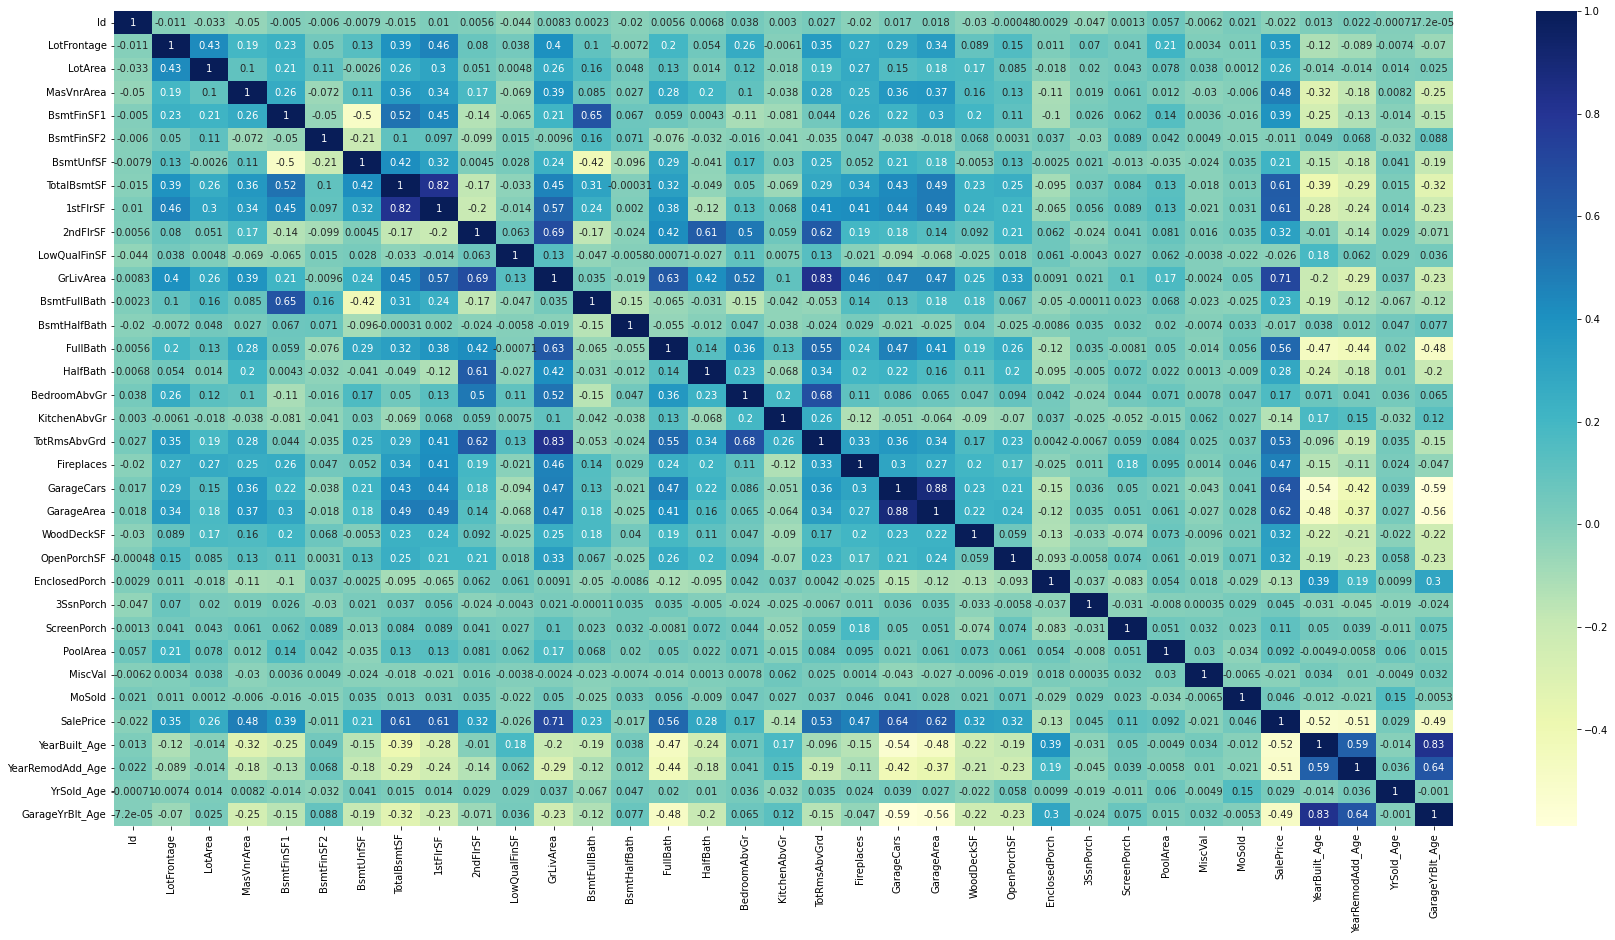

In [43]:
plt.figure(figsize=(30,15))
sns.heatmap(house_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [44]:
categorical_columns = house_df.select_dtypes(exclude=["number","bool_"]).columns
for column_name in categorical_columns:
    print("Column Name: {}".format(column_name))
    print("{}\n\n".format(house_df[column_name].value_counts()))

Column Name: MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64


Column Name: MSZoning
RL    

### From above, we have following columns which are highly skewed and can be dropped:
- Utilities
- LandContour
- Alley
- Street
- MSZoning
- LotConfig
- LandSlope
- Condition1
- Condition2
- RoofStyle
- RoofMatl
- ExterCond
- BsmtCond
- BsmtFinType2
- Heating
- CentralAir
- Electrical
- Functional
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition

In [45]:
columns_to_remove = ["Utilities",
"LandContour",
"Alley",
"Street",
"MSZoning",
"LotConfig",
"LandSlope",
"Condition1",
"Condition2",
"RoofStyle",
"RoofMatl",
"ExterCond",
"BsmtCond",
"BsmtFinType2",
"Heating",
"CentralAir",
"Electrical",
"Functional",
"GarageQual",
"GarageCond",
"PavedDrive",
"PoolQC",
"Fence",
"MiscFeature",
"SaleType",
"SaleCondition"]

house_df.drop(columns_to_remove, axis = 1, inplace = True)

In [46]:
house_df.shape

(1460, 55)

In [47]:
cor_matrix = house_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
if 'SalePrice' in to_drop:
    to_drop.remove('SalePrice')
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt_Age']


In [48]:
to_drop.append('Id')
print(house_df.shape)
house_df.drop(to_drop, axis = 1, inplace = True)
print(house_df.shape)

(1460, 55)
(1460, 50)


### Lets find features which are related to SalePrice

In [49]:
corr_val = house_df[list(house_df.dtypes[house_df.dtypes != 'object'].index)].corr()
corr_coef = corr_val[corr_val['SalePrice'] > 0.4]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

GrLivArea      0.708624
GarageCars     0.640409
TotalBsmtSF    0.613581
FullBath       0.560664
MasVnrArea     0.477493
Fireplaces     0.466929
Name: SalePrice, dtype: float64


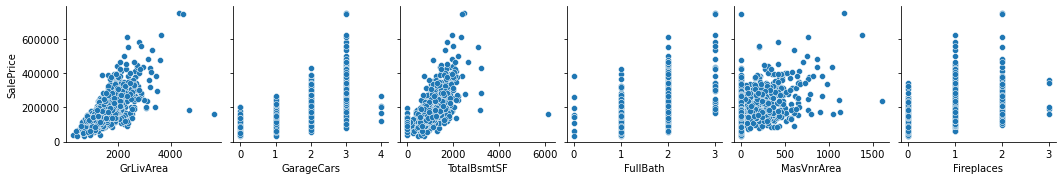

In [50]:
sns.pairplot(house_df, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]])
plt.show()

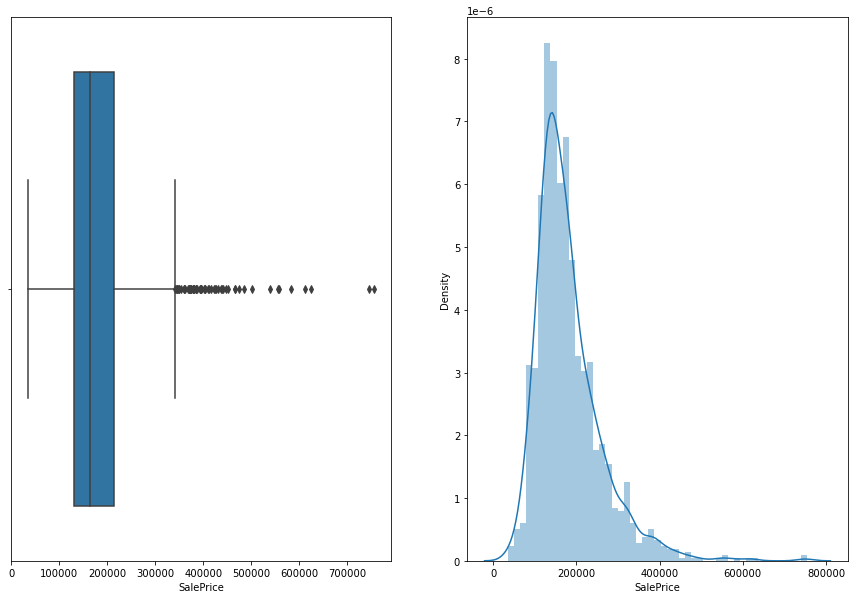

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))
sns.boxplot(house_df['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(house_df['SalePrice'], ax=axes[1])
plt.show()

In [52]:
print("Skewness: %f" % house_df['SalePrice'].skew())

Skewness: 1.882876


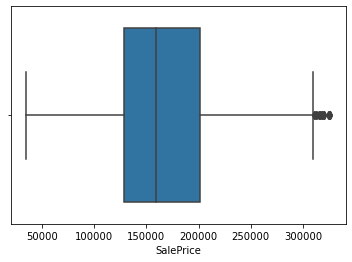

In [53]:
sbn.boxplot(house_df[house_df['SalePrice'] < house_df['SalePrice'].quantile(0.95)]['SalePrice'])
plt.show()

In [54]:
# Observation: With 0.95 percentile, box plot is looking good after all outline removal.
# need to make sure, date set to have value less than 0.98 percentile.
house_df = house_df[house_df['SalePrice'] < house_df['SalePrice'].quantile(0.95)]
print(house_df.shape)

(1387, 50)


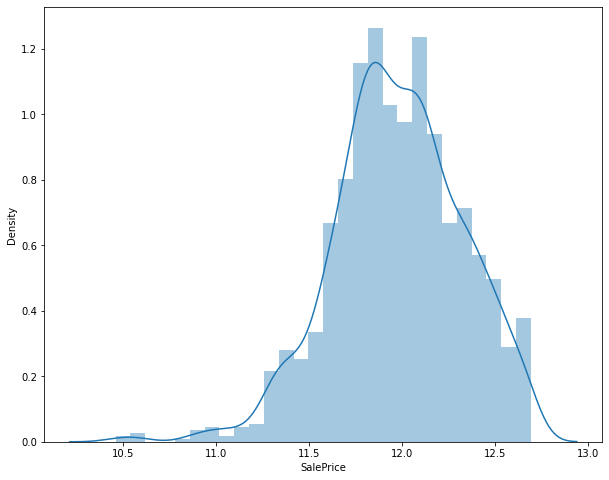

In [55]:
# SalePrice is very much skewed, checking if taking log will help.
saleprice_log = np.log(house_df['SalePrice'])
plt.figure(figsize=(10,8))
sns.distplot(saleprice_log)
plt.show()

In [56]:
print("Skewness: %f" % house_df['SalePrice'].skew())
# Skewness is reduced after Applying transformation (Log transformation)

Skewness: 0.619721


In [57]:
def fill_missing_values(df):    
    column_list = df.isnull().sum()
    column_list = column_list[column_list > 0]

    for col in column_list.index:
        column_dtype_name = df[col].dtype.name
        if column_dtype_name == 'object':
            # Categorical Columns
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif column_dtype_name == 'float64' or column_dtype_name == 'int64' or column_dtype_name == 'int32':
            # Numerical Columns
            df[col] = df[col].fillna((df[col].median()))
        else:
            print('Unknown column type for: {}'.format(col))
            
    return df

In [58]:
house_df = fill_missing_values(house_df)

In [59]:
total = house_df.isnull().sum().sort_values(ascending=False)
percent = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
MSSubClass,0,0.0
GarageCars,0,0.0
BsmtHalfBath,0,0.0
FullBath,0,0.0
HalfBath,0,0.0
BedroomAbvGr,0,0.0
KitchenAbvGr,0,0.0
KitchenQual,0,0.0
Fireplaces,0,0.0
FireplaceQu,0,0.0


In [60]:
categorical_columns = house_df.select_dtypes(exclude=["number","bool_"]).columns
print(categorical_columns)

numerical_columns = house_df.select_dtypes(include=["number"]).columns
print(numerical_columns)

Index(['MSSubClass', 'LotShape', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish'],
      dtype='object')
Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age'],
      dtype='object')


In [61]:
### Add dummy variables
dummies = pd.get_dummies(house_df[categorical_columns], drop_first = True)
house_df = pd.concat([house_df, dummies], axis = 1)
house_df.drop(categorical_columns, axis = 1, inplace = True)
print(house_df.shape)

(1387, 174)


### Creating test and train set and applying Scaling

In [62]:
y = house_df['SalePrice']
X = house_df.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [63]:
scaler = MinMaxScaler()
numerical_columns =['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age']

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
837,0.000000,0.003338,0.09875,0.146018,0.0,0.074927,0.150655,0.277228,0.0,0.150392,...,0,0,0,0,0,1,0,0,0,1
1257,0.119863,0.024243,0.00000,0.000000,0.0,0.423115,0.269495,0.000000,0.0,0.122064,...,0,0,0,0,0,0,1,1,0,0
601,0.099315,0.067633,0.00000,0.000000,0.0,0.381978,0.243294,0.327283,0.0,0.239751,...,0,0,0,0,0,1,0,0,0,1
1185,0.133562,0.074116,0.00000,0.173451,0.0,0.191969,0.244541,0.149615,0.0,0.204284,...,0,1,0,0,0,0,0,0,0,1
568,0.198630,0.096856,0.00000,0.637611,0.0,0.026934,0.466625,0.349835,0.0,0.414095,...,0,0,0,1,0,0,0,0,0,0


In [64]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

### Base Linear Regression Model

In [65]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with all features
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 15),
 ('FullBath', False, 22),
 ('HalfBath', False, 41),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 80),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 8),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 76),
 ('YearBuilt_Age', True, 1),
 ('YearRemodAdd_Age', False, 11),
 ('YrSold_Age', False, 43),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 26),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 66),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 65),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 194

In [67]:
selected_col = X_train.columns[rfe.support_]
print(selected_col)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_2fmCon'

In [68]:
X_train_rfe = X_train[selected_col]
X_test_rfe = X_test[selected_col]

In [69]:
print("X_train_rfe.shape: {}".format(X_train_rfe.shape))
print("X_test_rfe.shape: {}".format(X_test_rfe.shape))

X_train_rfe.shape: (970, 86)
X_test_rfe.shape: (417, 86)


In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [71]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:46   Log-Likelihood:                -10705.
No. Observations:                 970   AIC:                         2.157e+04
Df Residuals:                     890   BIC:                         2.196e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [72]:
X_test_new = sm.add_constant(X_test_rfe)
y_test_pred = lm.predict(X_test_new)
print("Base RFE Model Test R2 score: {}".format(r2_score(y_test, y_test_pred)))

Base RFE Model Test R2 score: 0.6352209205184032


In [73]:
X_train_new = sm.add_constant(X_train_rfe)
y_train_pred = lm.predict(X_train_new)
print("Base RFE Model Test R2 score: {}".format(r2_score(y_train, y_train_pred)))

Base RFE Model Test R2 score: 0.9320045705297403


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vhf(X):
    
    '''
    Util method to calculate VIF metrics
    input: datas set
    output: VIF metrics
    return: None
    '''
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [75]:
def get_OLS_Model(X_train_rfe):
    
    '''
    Util method to get model.
    input: training set data.
    output: None
    return: model and updated train set.
    '''
    X_train_lm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_lm).fit()
    print(lm.summary())
    return lm, X_train_lm

### Dropping some of the features with high p-value/VIF values

In [76]:
X_train_rfe.drop(['MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES'], axis = 1, inplace = True)
lm, X_train_lm = get_OLS_Model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:46   Log-Likelihood:                -10705.
No. Observations:                 970   AIC:                         2.157e+04
Df Residuals:                     890   BIC:                         2.196e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [77]:
get_vhf(X_train_rfe)

                                        Features   VIF
85                        GarageFinish_No Garage   inf
23       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
84                          GarageType_No Garage   inf
75                      BsmtFinType1_No Basement   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
39                          Neighborhood_Veenker  1.13
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
21  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08
76                                  HeatingQC_Po  1.06

[86 rows x 2 columns]


In [78]:
def update_model(column_name):
    
    '''
    Util method to remove one columns and re-build model and get VIF values.
    input: columns name.
    output: None
    return: updated model, train set.
    '''
    X_train_rfe.drop([column_name], axis = 1, inplace = True)
    lm, X_train_lm = get_OLS_Model(X_train_rfe)
    get_vhf(X_train_lm)
    return lm, X_train_lm, X_train_rfe

In [79]:
lm, X_train_lm, X_train_rfe = update_model('BldgType_2fmCon')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:47   Log-Likelihood:                -10705.
No. Observations:                 970   AIC:                         2.157e+04
Df Residuals:                     891   BIC:                         2.195e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
84                        GarageFinish_No Garage   inf
23       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
83                          GarageType_No Garage   inf
74                      BsmtFinType1_No Basement   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
17                                   ScreenPorch  1.13
16                                     3SsnPorch  1.09
18                                      PoolArea  1.09
21  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08
75                                  HeatingQC_Po  1.06

[85 rows x 2 columns]


In [80]:
lm, X_train_lm, X_train_rfe = update_model('Exterior1st_CBlock')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:47   Log-Likelihood:                -10705.
No. Observations:                 970   AIC:                         2.157e+04
Df Residuals:                     891   BIC:                         2.195e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
83                        GarageFinish_No Garage   inf
23       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
82                          GarageType_No Garage   inf
73                      BsmtFinType1_No Basement   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
21  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08
74                                  HeatingQC_Po  1.06
60                            Exterior2nd_CBlock  1.03

[84 rows x 2 columns]


In [81]:
lm, X_train_lm, X_train_rfe = update_model('HeatingQC_Po')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:48   Log-Likelihood:                -10706.
No. Observations:                 970   AIC:                         2.157e+04
Df Residuals:                     892   BIC:                         2.195e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
82                        GarageFinish_No Garage   inf
23       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
81                          GarageType_No Garage   inf
73                      BsmtFinType1_No Basement   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
65                              Foundation_Stone  1.13
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
21  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08
60                            Exterior2nd_CBlock  1.03

[83 rows x 2 columns]


In [82]:
lm, X_train_lm, X_train_rfe = update_model('Exterior2nd_CBlock')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     160.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:49   Log-Likelihood:                -10706.
No. Observations:                 970   AIC:                         2.157e+04
Df Residuals:                     893   BIC:                         2.194e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
81                        GarageFinish_No Garage   inf
23       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
80                          GarageType_No Garage   inf
72                      BsmtFinType1_No Basement   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
17                                   ScreenPorch  1.13
64                              Foundation_Stone  1.13
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
21  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08

[82 rows x 2 columns]


In [83]:
lm, X_train_lm, X_train_rfe = update_model('MiscVal')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:49   Log-Likelihood:                -10706.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     894   BIC:                         2.193e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
80                        GarageFinish_No Garage   inf
22       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
79                          GarageType_No Garage   inf
71                      BsmtFinType1_No Basement   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
17                                   ScreenPorch  1.13
63                              Foundation_Stone  1.10
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
20  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08

[81 rows x 2 columns]


In [84]:
lm, X_train_lm, X_train_rfe = update_model('BsmtExposure_No Basement')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     165.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -10706.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     895   BIC:                         2.193e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
79                        GarageFinish_No Garage   inf
22       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
78                          GarageType_No Garage   inf
70                      BsmtFinType1_No Basement   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
17                                   ScreenPorch  1.13
63                              Foundation_Stone  1.10
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
20  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08

[80 rows x 2 columns]


In [85]:
lm, X_train_lm, X_train_rfe = update_model('BsmtQual_No Basement')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     165.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:51   Log-Likelihood:                -10706.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     895   BIC:                         2.193e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
39                               BldgType_Duplex   inf
7                                    TotalBsmtSF   inf
77                          GarageType_No Garage   inf
59                           Exterior2nd_CmentBd   inf
55                           Exterior1st_CemntBd   inf
..                                           ...   ...
52                         OverallCond_Very Poor  1.13
63                              Foundation_Stone  1.10
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
20  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08

[79 rows x 2 columns]


In [86]:
lm, X_train_lm, X_train_rfe = update_model('BsmtFinType1_No Basement')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     167.8
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:51   Log-Likelihood:                -10707.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     896   BIC:                         2.192e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
39                               BldgType_Duplex   inf
7                                    TotalBsmtSF   inf
76                          GarageType_No Garage   inf
59                           Exterior2nd_CmentBd   inf
55                           Exterior1st_CemntBd   inf
..                                           ...   ...
52                         OverallCond_Very Poor  1.13
63                              Foundation_Stone  1.10
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
20  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08

[78 rows x 2 columns]


In [87]:
lm, X_train_lm, X_train_rfe = update_model('Exterior2nd_Stone')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:52   Log-Likelihood:                -10707.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     897   BIC:                         2.192e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                        Features   VIF
76                        GarageFinish_No Garage   inf
22       MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
75                          GarageType_No Garage   inf
59                           Exterior2nd_CmentBd   inf
4                                     BsmtFinSF1   inf
..                                           ...   ...
52                         OverallCond_Very Poor  1.12
62                              Foundation_Stone  1.10
18                                      PoolArea  1.09
16                                     3SsnPorch  1.09
20  MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.08

[77 rows x 2 columns]


In [88]:
lm, X_train_lm, X_train_rfe = update_model('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:53   Log-Likelihood:                -10707.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     898   BIC:                         2.191e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                 Features   VIF
38        BldgType_Duplex   inf
7             TotalBsmtSF   inf
74   GarageType_No Garage   inf
58    Exterior2nd_CmentBd   inf
54    Exterior1st_CemntBd   inf
..                    ...   ...
51  OverallCond_Very Poor  1.12
17            ScreenPorch  1.12
61       Foundation_Stone  1.10
18               PoolArea  1.09
16              3SsnPorch  1.09

[76 rows x 2 columns]


In [89]:
lm, X_train_lm, X_train_rfe = update_model('HouseStyle_2.5Fin')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     175.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:53   Log-Likelihood:                -10708.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     899   BIC:                         2.190e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                   Features   VIF
74                   GarageFinish_No Garage   inf
21  MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
73                     GarageType_No Garage   inf
57                      Exterior2nd_CmentBd   inf
4                                BsmtFinSF1   inf
..                                      ...   ...
17                              ScreenPorch  1.12
50                    OverallCond_Very Poor  1.12
60                         Foundation_Stone  1.10
16                                3SsnPorch  1.09
18                                 PoolArea  1.08

[75 rows x 2 columns]


In [90]:
lm, X_train_lm, X_train_rfe = update_model('Exterior1st_Stone')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:54   Log-Likelihood:                -10709.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     900   BIC:                         2.190e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                   Features   VIF
73                   GarageFinish_No Garage   inf
21  MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
72                     GarageType_No Garage   inf
56                      Exterior2nd_CmentBd   inf
4                                BsmtFinSF1   inf
..                                      ...   ...
17                              ScreenPorch  1.12
50                    OverallCond_Very Poor  1.12
59                         Foundation_Stone  1.10
16                                3SsnPorch  1.09
18                                 PoolArea  1.08

[74 rows x 2 columns]


In [91]:
lm, X_train_lm, X_train_rfe = update_model('Neighborhood_Veenker')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:54   Log-Likelihood:                -10709.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     901   BIC:                         2.189e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

                                   Features   VIF
72                   GarageFinish_No Garage   inf
21  MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
71                     GarageType_No Garage   inf
55                      Exterior2nd_CmentBd   inf
4                                BsmtFinSF1   inf
..                                      ...   ...
49                    OverallCond_Very Poor  1.12
17                              ScreenPorch  1.12
58                         Foundation_Stone  1.10
16                                3SsnPorch  1.09
18                                 PoolArea  1.08

[73 rows x 2 columns]


In [92]:
lm, X_train_lm, X_train_rfe = update_model('MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:55   Log-Likelihood:                -10711.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     902   BIC:                         2.189e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

                 Features   VIF
36        BldgType_Duplex   inf
7             TotalBsmtSF   inf
70   GarageType_No Garage   inf
54    Exterior2nd_CmentBd   inf
51    Exterior1st_CemntBd   inf
..                    ...   ...
17            ScreenPorch  1.12
48  OverallCond_Very Poor  1.12
57       Foundation_Stone  1.10
16              3SsnPorch  1.09
18               PoolArea  1.08

[72 rows x 2 columns]


In [93]:
lm, X_train_lm, X_train_rfe = update_model('BsmtFinSF1')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:55   Log-Likelihood:                -10711.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     902   BIC:                         2.189e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

                                   Features   VIF
35                          BldgType_Duplex   inf
20  MSSubClass_DUPLEX - ALL STYLES AND AGES   inf
69                     GarageType_No Garage   inf
53                      Exterior2nd_CmentBd   inf
50                      Exterior1st_CemntBd   inf
..                                      ...   ...
47                    OverallCond_Very Poor  1.12
16                              ScreenPorch  1.12
56                         Foundation_Stone  1.10
15                                3SsnPorch  1.09
17                                 PoolArea  1.08

[71 rows x 2 columns]


In [94]:
lm, X_train_lm, X_train_rfe = update_model('BldgType_Duplex')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:56   Log-Likelihood:                -10711.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     902   BIC:                         2.189e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

                  Features     VIF
69  GarageFinish_No Garage     inf
49     Exterior1st_CemntBd     inf
68    GarageType_No Garage     inf
52     Exterior2nd_CmentBd     inf
0                    const  324.04
..                     ...     ...
46   OverallCond_Very Poor    1.12
16             ScreenPorch    1.12
55        Foundation_Stone    1.10
15               3SsnPorch    1.09
17                PoolArea    1.08

[70 rows x 2 columns]


In [95]:
lm, X_train_lm, X_train_rfe = update_model('GarageFinish_No Garage')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:56   Log-Likelihood:                -10711.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     902   BIC:                         2.189e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

                 Features     VIF
49    Exterior1st_CemntBd     inf
52    Exterior2nd_CmentBd     inf
0                   const  324.04
64      GarageType_Attchd   39.02
67      GarageType_Detchd   32.06
..                    ...     ...
46  OverallCond_Very Poor    1.12
16            ScreenPorch    1.12
55       Foundation_Stone    1.10
15              3SsnPorch    1.09
17               PoolArea    1.08

[69 rows x 2 columns]


In [96]:
lm, X_train_lm, X_train_rfe = update_model('Exterior1st_CemntBd')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:46:57   Log-Likelihood:                -10711.
No. Observations:                 970   AIC:                         2.156e+04
Df Residuals:                     902   BIC:                         2.189e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

                 Features     VIF
0                   const  324.04
63      GarageType_Attchd   39.02
66      GarageType_Detchd   32.06
53    Exterior2nd_VinylSd   19.48
49    Exterior1st_VinylSd   19.45
..                    ...     ...
46  OverallCond_Very Poor    1.12
16            ScreenPorch    1.12
54       Foundation_Stone    1.10
15              3SsnPorch    1.09
17               PoolArea    1.08

[68 rows x 2 columns]


In [97]:
# Plot the histogram of the error terms
def get_error_plot(y_train, y_train_pred):
    
    '''
    Util method to plot error (residual) plot
    input: original Y value, prodicted Y value
    output: residual plot
    return: None
    '''
    fig = plt.figure()
    sns.distplot((y_train - y_train_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)
    plt.xlabel('Errors', fontsize = 18)

In [98]:
y_train_pred = lm.predict(X_train_lm)

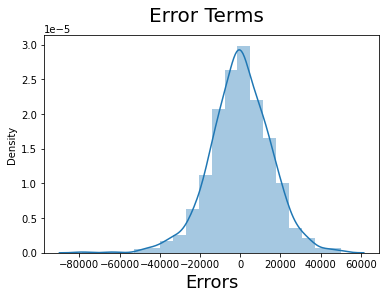

In [99]:
get_error_plot(y_train, y_train_pred)

In [100]:
r2_score(y_train, y_train_pred)

0.931253554845425

In [101]:
X_train_rfe.columns

Index(['const', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YearBuilt_Age',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'OverallQual_Excellent', 'OverallQual_Good',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'OverallCond_Average', 'OverallCond_Below Average',
       'OverallCond_Excellent', 'OverallCond_Fair', 'OverallCond_Good',
     

In [102]:
x_test_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars',
       'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YearBuilt_Age',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'OverallQual_Excellent', 'OverallQual_Good',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'OverallCond_Average', 'OverallCond_Below Average',
       'OverallCond_Excellent', 'OverallCond_Fair', 'OverallCond_Good',
       'OverallCond_Poor', 'OverallCond_Very Good', 'OverallCond_Very Poor',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_VinylSd',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'Exterior2nd_Other',
       'Exterior2nd_VinylSd', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageType_No Garage']

In [103]:
X_test_new = X_test[x_test_columns]
X_test_new = sm.add_constant(X_test_new)

y_test_pred = lm.predict(X_test_new)
r2_score(y_test, y_test_pred)

0.6382507504925099

### Model building:
- Lasso
- Ridge

#### Ridge Model
- For Ridge we will develop two models:
    - One with RFE, so that we can use the feature selection done by RFE above
    - Without RFE on all features
- RFE cannot be used in Lasso, as Lasso does Feature Selection also.

In [104]:
X_train_rfe = X_train[selected_col]
X_test_rfe = X_test[selected_col]

In [105]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

folds = KFold(n_splits=10,shuffle=True,random_state=100)
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train) 

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [106]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=100]
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010501,0.017556,0.0031,0.000702,0.0001,{'alpha': 0.0001},0.875587,0.885950,0.908893,0.687832,...,0.933597,0.932909,0.932771,0.933135,0.931219,0.933082,0.931188,0.931914,0.932926,0.001185
1,0.004200,0.000402,0.0027,0.000782,0.001,{'alpha': 0.001},0.875620,0.885946,0.908904,0.687876,...,0.933597,0.932909,0.932771,0.933135,0.931219,0.933082,0.931188,0.931914,0.932926,0.001185
2,0.004400,0.000917,0.0028,0.000872,0.01,{'alpha': 0.01},0.875951,0.885897,0.909012,0.688310,...,0.933592,0.932908,0.932765,0.933129,0.931213,0.933076,0.931181,0.931909,0.932921,0.001185
3,0.004100,0.000700,0.0024,0.000663,0.1,{'alpha': 0.1},0.878752,0.885203,0.909786,0.692396,...,0.933134,0.932820,0.932318,0.932650,0.930754,0.932600,0.930698,0.931456,0.932498,0.001197
4,0.004100,0.000831,0.0027,0.000781,10,{'alpha': 10},0.874707,0.849059,0.881161,0.786211,...,0.885774,0.898911,0.886431,0.885318,0.883800,0.883628,0.883304,0.886718,0.887000,0.004320
5,0.004500,0.001360,0.0031,0.000538,100,{'alpha': 100},0.743060,0.701864,0.705665,0.705294,...,0.723731,0.724442,0.728418,0.724952,0.720189,0.716133,0.720647,0.726416,0.723451,0.003653


In [107]:
def plot_score_alpha(model_cv_obj):
    # plotting mean test and train scoes with alpha 
    model_cv_obj['param_alpha'] = model_cv_obj['param_alpha'].astype('int32')

    # plotting
    plt.plot(model_cv_obj['param_alpha'], model_cv_obj['mean_train_score'])
    plt.plot(model_cv_obj['param_alpha'], model_cv_obj['mean_test_score'])
    plt.xlabel('Alpha')
    plt.ylabel('R2')
    plt.title("R2 and Alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

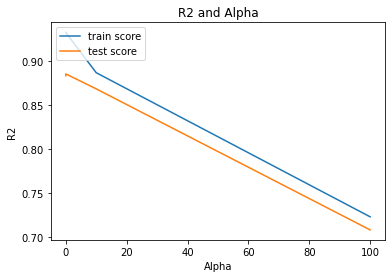

In [108]:
plot_score_alpha(ridge_cv_results)

In [109]:
print('For Ridge, the Best Alpha value = ', ridge_model_cv.best_params_['alpha'])

For Ridge, the Best Alpha value =  0.1


In [110]:
selected_redge_alpha = 0.1
ridge = Ridge(alpha=selected_redge_alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 1.89866545e+04,  9.76733622e+04,  1.49413907e+04,  4.45114753e+04,
        1.50228964e+04,  1.85872003e+04,  5.01231274e+04,  2.30339693e+04,
       -1.85491680e+04,  1.57776788e+05,  9.66228576e+03, -1.26759787e+04,
       -3.76142909e+04,  3.31031480e+04,  1.17287350e+04,  1.49520070e+04,
        1.59852543e+04,  3.44886550e+04,  6.70759275e+03, -5.13077941e+04,
        7.63858977e+03, -1.01601170e+02, -2.23207705e+04, -3.06026935e+03,
       -1.27018262e+04, -1.17587786e+04,  1.53018894e+04, -1.29288177e+04,
       -1.18401490e+04, -1.55465143e+04, -1.29399699e+04, -9.86281796e+03,
       -7.17176827e+03,  1.34434177e+04,  1.32295468e+04, -1.39489961e+04,
       -1.09626289e+04,  1.58697816e+04,  1.39000440e+04,  9.16153805e+03,
       -1.01601170e+02, -3.06026935e+03,  1.08293469e+04,  5.28240369e+04,
        1.42770531e+04, -2.47922480e+05,  3.30017363e+04, -8.22215253e+03,
       -1.63631105e+04,  1.36743767e+04, -3.18851046e+04,  8.87199985e+03,
       -2.32706999e+04,  

In [111]:
ridge.score(X_train_rfe,y_train)

0.9316079227527013

In [112]:
ridge.score(X_test_rfe,y_test)

0.6672978649269445

In [113]:
def get_model_parameters(model_obj):
    model_parameters = list(sorted(model_obj.coef_))
    model_parameters.insert(0, model_obj.intercept_)
    model_parameters = [round(x, 3) for x in model_parameters]
    cols = X.columns
    cols = cols.insert(0, "constant")
    return list(zip(cols, model_parameters))

In [114]:
# Ridge model parameters
get_model_parameters(ridge)

[('constant', 92645.478),
 ('LotFrontage', -247922.48),
 ('LotArea', -51307.794),
 ('MasVnrArea', -37614.291),
 ('BsmtFinSF1', -35055.908),
 ('BsmtFinSF2', -31885.105),
 ('BsmtUnfSF', -26690.256),
 ('TotalBsmtSF', -24711.455),
 ('2ndFlrSF', -23270.7),
 ('LowQualFinSF', -22320.77),
 ('GrLivArea', -18549.168),
 ('BsmtFullBath', -16950.99),
 ('BsmtHalfBath', -16363.11),
 ('FullBath', -15546.514),
 ('HalfBath', -13948.996),
 ('BedroomAbvGr', -13696.983),
 ('KitchenAbvGr', -12939.97),
 ('Fireplaces', -12928.818),
 ('GarageCars', -12701.826),
 ('WoodDeckSF', -12675.979),
 ('OpenPorchSF', -12101.535),
 ('EnclosedPorch', -12038.582),
 ('3SsnPorch', -11840.149),
 ('ScreenPorch', -11758.779),
 ('PoolArea', -11694.077),
 ('MiscVal', -10962.629),
 ('MoSold', -10162.874),
 ('YearBuilt_Age', -9950.436),
 ('YearRemodAdd_Age', -9862.818),
 ('YrSold_Age', -8222.153),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -7867.398),
 ('MSSubClass_1-STORY 1945 & OLDER', -7741.877),
 ('MSSubClass_1-STORY 1946 & N

### Without RFE

In [115]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

folds = KFold(n_splits=10,shuffle=True,random_state=100)
ridge_model_cv_2 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv_2.fit(X_train, y_train) 

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [118]:
ridge_cv_results_2 = pd.DataFrame(ridge_model_cv_2.cv_results_)
ridge_cv_results_2 = ridge_cv_results_2[ridge_cv_results_2['param_alpha']<=100]
ridge_cv_results_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009000,0.002145,0.003799,0.001249,0.0001,{'alpha': 0.0001},0.862741,0.856935,0.894037,0.680014,...,0.940740,0.941290,0.939266,0.940958,0.938783,0.939112,0.938410,0.939752,0.940274,0.001327
1,0.007201,0.000980,0.003799,0.000872,0.001,{'alpha': 0.001},0.862845,0.856963,0.894121,0.680079,...,0.940740,0.941290,0.939266,0.940958,0.938783,0.939111,0.938410,0.939752,0.940273,0.001327
2,0.007001,0.001789,0.003499,0.000500,0.01,{'alpha': 0.01},0.863854,0.857197,0.894872,0.680713,...,0.940732,0.941288,0.939255,0.940948,0.938775,0.939104,0.938401,0.939745,0.940266,0.001327
3,0.007401,0.001281,0.003799,0.000872,0.1,{'alpha': 0.1},0.871623,0.857954,0.899066,0.686116,...,0.940164,0.941163,0.938694,0.940325,0.938239,0.938560,0.937809,0.939219,0.939753,0.001372
4,0.007000,0.000775,0.003599,0.001021,10,{'alpha': 10},0.879452,0.833004,0.890852,0.756971,...,0.900746,0.914544,0.901690,0.902233,0.899687,0.897832,0.898575,0.902813,0.902510,0.004481
5,0.007901,0.001700,0.004099,0.001300,100,{'alpha': 100},0.792063,0.743950,0.778065,0.720155,...,0.802144,0.810908,0.803046,0.805390,0.798121,0.794175,0.797259,0.803230,0.802300,0.004618


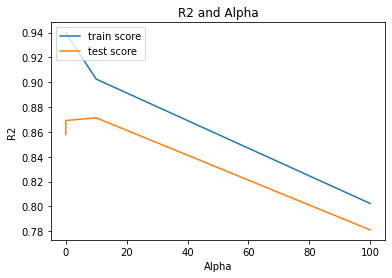

In [119]:
plot_score_alpha(ridge_cv_results_2)

In [120]:
print('For Ridge, the Best Alpha value = ', ridge_model_cv_2.best_params_)

For Ridge, the Best Alpha value =  {'alpha': 10}


In [121]:
selected_redge_alpha = 10
ridge = Ridge(alpha=selected_redge_alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 10263.25365006,  15319.48791948,   6324.64284463,  23306.41910316,
         7125.98422731,  13747.81933059,  28462.0258881 ,  20321.11430835,
         -507.01790303,  33211.94764402,  10307.24113966,  -2157.55680069,
        17024.22201497,   8516.34094935,  12068.80528851,  -2757.97490095,
         9070.00860862,  26797.84633521,  12421.5283581 ,   6293.34653265,
         2144.53778066,   3820.80690209,   8262.14983807,   7003.04978597,
         1616.76827607,   1082.30012767,  -9723.61567434, -11624.75722976,
         3515.62183791,   1702.54187158,  -6051.22703659,   5559.8734103 ,
        -3871.98522741,   1966.68464565,  -1914.18348353,   4572.48160133,
         5171.02805679,   7193.5609793 , -11257.72691705,    812.24488073,
        -3277.73494198,    257.25536292,   1972.54911757,   6198.02266   ,
         3668.23701625,  -2747.49895364,   -626.51349363,    150.15685979,
         2746.07889639,   6811.19254813,  -1332.33519644,  13903.24603359,
        -9340.02362024,  

In [122]:
print("Train Score: {}".format(ridge.score(X_train,y_train)))
print("Test Score: {}".format(ridge.score(X_test,y_test)))

Train Score: 0.9029811144283131
Test Score: 0.8057896429267131


In [123]:
# Ridge model parameters
get_model_parameters(ridge)

[('constant', 134460.954),
 ('LotFrontage', -14537.987),
 ('LotArea', -14254.689),
 ('MasVnrArea', -12897.454),
 ('BsmtFinSF1', -12499.056),
 ('BsmtFinSF2', -12181.105),
 ('BsmtUnfSF', -11624.757),
 ('TotalBsmtSF', -11438.739),
 ('2ndFlrSF', -11257.727),
 ('LowQualFinSF', -10557.951),
 ('GrLivArea', -9946.115),
 ('BsmtFullBath', -9723.616),
 ('BsmtHalfBath', -9497.544),
 ('FullBath', -9340.024),
 ('HalfBath', -9297.361),
 ('BedroomAbvGr', -8997.273),
 ('KitchenAbvGr', -8982.903),
 ('Fireplaces', -8485.925),
 ('GarageCars', -8152.427),
 ('WoodDeckSF', -7840.055),
 ('OpenPorchSF', -7825.906),
 ('EnclosedPorch', -7393.427),
 ('3SsnPorch', -7135.659),
 ('ScreenPorch', -6976.992),
 ('PoolArea', -6687.296),
 ('MiscVal', -6356.225),
 ('MoSold', -6352.657),
 ('YearBuilt_Age', -6237.227),
 ('YearRemodAdd_Age', -6051.227),
 ('YrSold_Age', -5945.565),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -5740.938),
 ('MSSubClass_1-STORY 1945 & OLDER', -5726.574),
 ('MSSubClass_1-STORY 1946 & NEWER ALL S

#### Lasso Model
- For Lasso model, we will not be using RFE based selection, as Lasso is supposed to do Feature Selection

In [124]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


lasso = Lasso()

folds = KFold(n_splits=10,shuffle=True,random_state=100)
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_lasso_cv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [125]:
lasso_cv_results = pd.DataFrame(model_lasso_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=100]
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.094699,0.007688,0.003104,0.000830,0.0001,{'alpha': 0.0001},0.862728,0.858070,0.894432,0.680005,...,0.940739,0.941290,0.939264,0.940958,0.938783,0.939111,0.938409,0.939752,0.940273,0.001327
1,0.098099,0.009446,0.002701,0.000898,0.001,{'alpha': 0.001},0.862730,0.858065,0.894434,0.680006,...,0.940739,0.941290,0.939264,0.940958,0.938783,0.939111,0.938409,0.939752,0.940273,0.001327
2,0.099513,0.009484,0.003194,0.000874,0.01,{'alpha': 0.01},0.862752,0.858009,0.894459,0.680017,...,0.940739,0.941290,0.939264,0.940958,0.938783,0.939111,0.938409,0.939752,0.940273,0.001327
3,0.094510,0.012667,0.002704,0.000906,0.1,{'alpha': 0.1},0.862976,0.857602,0.894710,0.680128,...,0.940738,0.941290,0.939261,0.940958,0.938783,0.939111,0.938408,0.939752,0.940272,0.001327
4,0.027109,0.008183,0.002491,0.000807,10,{'alpha': 10},0.880597,0.862965,0.903336,0.689147,...,0.939441,0.940060,0.937903,0.939704,0.937531,0.937887,0.937104,0.938418,0.939007,0.001366
5,0.009801,0.002131,0.002200,0.000600,100,{'alpha': 100},0.888854,0.863436,0.897648,0.731902,...,0.919553,0.926638,0.919606,0.920898,0.917097,0.918391,0.915896,0.919310,0.920113,0.002836


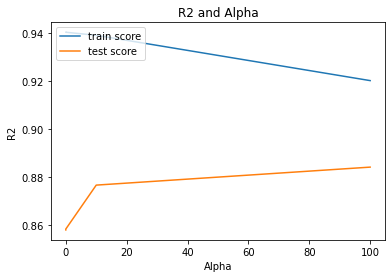

In [127]:
plot_score_alpha(lasso_cv_results)

In [128]:
print('For Lasso, the Best Alpha value = ', model_lasso_cv.best_params_)

For Lasso, the Best Alpha value =  {'alpha': 100}


In [129]:
selected_lasso_alpha = 100
lasso = Lasso(alpha=selected_lasso_alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.00000000e+00,  4.55900262e+04,  0.00000000e+00,  2.02064863e+04,
        0.00000000e+00,  0.00000000e+00,  6.37779668e+04,  1.52655716e+04,
       -0.00000000e+00,  1.29104937e+05,  7.21223970e+03, -0.00000000e+00,
        1.77441391e+02,  3.34533000e+03,  0.00000000e+00, -7.53677615e+03,
        0.00000000e+00,  3.11901010e+04,  9.68873253e+03,  3.25322004e+02,
        0.00000000e+00,  0.00000000e+00,  7.15802918e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.72875723e+04, -9.96153527e+03,
        1.95448897e+03,  0.00000000e+00, -0.00000000e+00,  3.66551165e+03,
       -0.00000000e+00,  0.00000000e+00, -1.24986037e+02,  0.00000000e+00,
        7.51599301e+02,  3.89531920e+03, -9.90721525e+03, -8.80103094e+02,
       -0.00000000e+00, -0.00000000e+00,  1.14202544e+03,  3.37891494e+03,
        0.00000000e+00, -1.64613631e+03, -0.00000000e+00,  0.00000000e+00,
        5.00862139e+03,  0.00000000e+00,  0.00000000e+00,  1.66463888e+04,
       -5.55397207e+03, -

In [130]:
lasso.score(X_train,y_train)

0.9182270626190205

In [131]:
lasso.score(X_test,y_test)

0.7738520436901031

In [132]:
# Lasso model parameters
get_model_parameters(lasso)

[('constant', 104789.886),
 ('LotFrontage', -105344.844),
 ('LotArea', -27287.572),
 ('MasVnrArea', -22723.014),
 ('BsmtFinSF1', -10486.049),
 ('BsmtFinSF2', -9961.535),
 ('BsmtUnfSF', -9907.215),
 ('TotalBsmtSF', -9879.131),
 ('2ndFlrSF', -8901.455),
 ('LowQualFinSF', -8370.775),
 ('GrLivArea', -7536.776),
 ('BsmtFullBath', -7513.47),
 ('BsmtHalfBath', -7423.623),
 ('FullBath', -6885.067),
 ('HalfBath', -5898.237),
 ('BedroomAbvGr', -5747.332),
 ('KitchenAbvGr', -5553.972),
 ('Fireplaces', -5529.313),
 ('GarageCars', -4988.758),
 ('WoodDeckSF', -4531.898),
 ('OpenPorchSF', -4392.206),
 ('EnclosedPorch', -4269.087),
 ('3SsnPorch', -4199.032),
 ('ScreenPorch', -4088.442),
 ('PoolArea', -3849.747),
 ('MiscVal', -2515.167),
 ('MoSold', -2351.086),
 ('YearBuilt_Age', -2309.114),
 ('YearRemodAdd_Age', -2158.152),
 ('YrSold_Age', -1894.668),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -1646.136),
 ('MSSubClass_1-STORY 1945 & OLDER', -1535.09),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES'

### Conclusion

#### Values for Lasso and Ridge
- Base RFE: Rain: 93.2 Test: 63.5
- Ridge:
    - With RFE:    Train: 93.1 Test: 66.7
    - Without RFE: Train: 90.3 Test: 80.6
- Lasso: Train: 91.8 Test: 77.3

#### Final Alpha values:
- Ridge: 10
- Lasso: 100

#### Top 5 most significant variables in Ridge with RFE are:
- OverallQual_Average
- OverallQual_Below Average
- OverallQual_Excellent
- OverallQual_Fair
- OverallQual_Good

#### Top 5 most significant variables in Ridge without RFE are:
- GarageType_Detchd
- GarageType_No Garage
- GarageFinish_No Garage
- GarageFinish_RFn
- GarageFinish_Unf

#### Top 5 most significant variables in Lasso are:
- GarageType_Detchd
- GarageType_No Garage
- GarageFinish_No Garage
- GarageFinish_RFn
- GarageFinish_Unf